# Exploratory analysis
## Data preprocessing

Import libraries and dataset

In [417]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
import sklearn


# set seeds for reproducibility
np.random.seed(42)
random.seed(42)

# load the dataset
df=pd.read_csv('/Users/ava/Library/CloudStorage/OneDrive-UniversityofPlymouth/UNI/MSc/MATH516/CW/Dataset _01.csv')

### Inspect the dataset

In [418]:
# Inspect: number of samples and features
print(str("Dataset has ") + str(df.shape[0])+str(' samples/instances & ')+str(df.shape[1])+str(' features'))

Dataset has 94 samples/instances & 50 features


In [419]:
# Inspect the dataset
df.head(10)

Subjects  Grade  original_firstorder_Skewness_t1c  \
0  Meningioma-SEG-CLASS-001      1                         -0.202380   
1  Meningioma-SEG-CLASS-002      1                          0.078198   
2  Meningioma-SEG-CLASS-003      0                         -1.122465   
3  Meningioma-SEG-CLASS-004      0                         -0.559125   
4  Meningioma-SEG-CLASS-005      0                         -0.854174   
5  Meningioma-SEG-CLASS-006      0                         -0.931466   
6  Meningioma-SEG-CLASS-007      1                          0.448884   
7  Meningioma-SEG-CLASS-008      1                          0.241065   
8  Meningioma-SEG-CLASS-009      1                         -0.285657   
9  Meningioma-SEG-CLASS-010      0                         -0.884532   

   original_glrlm_HighGrayLevelRunEmphasis_t1c  \
0                                     1.000000   
1                                     3.998177   
2                                     3.970686   
3                                     3.970544   
4                                     1.000000   
5                                     1.000000   
6                                     3.993909   
7                                     3.996316   
8                                     3.991097   
9                                     1.000000   

   wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c  \
0                                           0.500000        
1                                           0.644970        
2                                           0.749135        
3                                           0.537190        
4                                           0.739645        
5                                           0.506173        
6                                           0.831260        
7                                           0.659735        
8                                           0.573964        
9                                           0.500000        

   wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c  \
0                                           0.781250        
1                                           0.792388        
2                                           0.755102        
3                                           0.531250        
4                                           0.501730        
5                                           0.573964        
6                                           0.706633        
7                                           0.614367        
8                                           0.518141        
9                                           0.625000        

   wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c  \
0                                           0.625000        
1                                           0.591837        
2                                           0.745000        
3                                           0.820000        
4                                           0.755102        
5                                           0.540816        
6                                           0.621063        
7                                           0.510204        
8                                           0.531250        
9                                           0.680000        

   wavelet-HLH_firstorder_Mean_t1c  wavelet-HLH_glszm_ZoneEntropy_t1c  \
0                         0.035199                           1.584963   
1                         0.002975                           2.521641   
2                         0.005018                           1.548795   
3                        -0.029598                           2.324863   
4                         0.003390                           2.128085   
5                        -0.004613                           2.751629   
6                         0.000667                           2.084963   
7                         0.006154                           2.500000   
8 

In [420]:
# inspect: feature names -- column names
df.columns

Index(['Subjects', 'Grade', 'original_firstorder_Skewness_t1c',
       'original_glrlm_HighGrayLevelRunEmphasis_t1c',
       'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLH_firstorder_Mean_t1c', 'wavelet-HLH_glszm_ZoneEntropy_t1c',
       'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c',
       'wavelet-HHH_firstorder_Skewness_t1c',
       'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c',
       'original_glszm_HighGrayLevelZoneEmphasis_t2f',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_RunVariance_t2f',
       'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-HHL_

### Clean the dataset

In [421]:
# does the dataset have missing values?
df.isna().sum().any()

False

no missing values so move on 


### Split the data
split early to avoid data leakage and to enable a fair evaluation of the model. 

In [422]:
from sklearn.model_selection import train_test_split

# split dataset into data and labels
X,y=df.drop(columns=['Grade']), df['Grade']

# split data into train and test sets;70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(65, 49) (29, 49) (65,) (29,)


### Outlier detection?
Multivariate methods (e.g., Mahalanobis distance, isolation forest) 
Do this after splitting the data as to allow for fair evaluation on completely 'unseen' data (aka test data set)

In [423]:
# first filter to only numerical features
X_num_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

covariance_matrix = np.cov(X_num_train, rowvar=False)
inv_cov_matrix = np.linalg.inv(covariance_matrix)

#check if the cov matrix is symmetric and positive definite using cholesky decomp
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
    
is_pos_def(covariance_matrix) #false so cant use mahalanobis distance


False

In [424]:
# use isolation forest 
#split data into labels and features

from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1, random_state=42)
yhat = iso.fit_predict(X_num_train)
#select all rows that are not outliers
mask = yhat != -1
X_num_train = X_num_train[mask]
y_train = y_train[mask]
# summarise the shape of the updated training dataset
print(X_num_train.shape, y_train.shape)



(58, 48) (58,)


/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [425]:
# find percentage dimensionality reduction
outliers = X_train.shape[0] - X_num_train.shape[0]
print("Number of outliers in the training dataset: {:.0f}".format(outliers))

Number of outliers in the training dataset: 7


## Exploratory Data Analysis

In [349]:
# join labels and features back together for training set for ease
df_num_train = pd.concat([X_num_train, y_train], axis =1)

In [350]:
# exploratory data analysis
stats_dataset = df_num_train.describe().T # transpose for ease of presentation
stats_dataset.head(10)

count      mean       std  \
original_firstorder_Skewness_t1c                     58.0 -0.268153  0.745448   
original_glrlm_HighGrayLevelRunEmphasis_t1c          58.0  3.052907  1.390167   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...   58.0  0.642015  0.107910   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...   58.0  0.636072  0.101844   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...   58.0  0.633456  0.103733   
wavelet-HLH_firstorder_Mean_t1c                      58.0  0.002481  0.008470   
wavelet-HLH_glszm_ZoneEntropy_t1c                    58.0  2.261172  0.638359   
wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c      58.0  2.513403  0.393870   
wavelet-HHH_firstorder_Skewness_t1c                  58.0 -0.062754  0.096463   
wavelet-HHH_glszm_SizeZoneNonUniformityNormaliz...   58.0  0.375280  0.124048   

                                                         min       25%  \
original_firstorder_Skewness_t1c                   -2.052332 -0.774200   
original_glrlm_HighGrayLevelRunEmphasis_t1c         1.000000  1.000000   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.500000  0.546328   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.500000  0.546097   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.500000  0.537190   
wavelet-HLH_firstorder_Mean_t1c                    -0.029598  0.000124   
wavelet-HLH_glszm_ZoneEntropy_t1c                   1.000000  1.824843   
wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c     1.500000  2.285714   
wavelet-HHH_firstorder_Skewness_t1c                -0.321219 -0.114590   
wavelet-HHH_glszm_SizeZoneNonUniformityNormaliz...  0.147929  0.280000   

                                                         50%       75%  \
original_firstorder_Skewness_t1c                   -0.247869  0.167168   
original_glrlm_HighGrayLevelRunEmphasis_t1c         3.988592  3.996284   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.629385  0.722222   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.617066  0.707399   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.619064  0.710773   
wavelet-HLH_firstorder_Mean_t1c                     0.001200  0.003142   
wavelet-HLH_glszm_ZoneEntropy_t1c                   2.323396  2.592421   
wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c     2.500000  2.800000   
wavelet-HHH_firstorder_Skewness_t1c                -0.042594  0.005685   
wavelet-HHH_glszm_SizeZoneNonUniformityNormaliz...  0.354167  0.500000   

                                                         max  
original_firstorder_Skewness_t1c                    1.442150  
original_glrlm_HighGrayLevelRunEmphasis_t1c         3.999413  
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.895062  
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.905000  
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.857988  
wavelet-HLH_firstorder_Mean_t1c                     0.037356  
wavelet-HLH_glszm_ZoneEntropy_t1c                   4.478859  
wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c     3.500000  
wavelet-HHH_firstorder_Skewness_t1c                 0.103130  
wavelet-HHH_glszm_SizeZoneNonUniformityNormaliz...  0.744898

In [351]:
# extract dataset for different grades and compare
grade_1=df_num_train[df_num_train['Grade']==0].describe().T
grade_1.head(5)

count      mean       std  \
original_firstorder_Skewness_t1c                     32.0 -0.524153  0.734724   
original_glrlm_HighGrayLevelRunEmphasis_t1c          32.0  2.760705  1.481329   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...   32.0  0.620845  0.104104   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...   32.0  0.612434  0.089030   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...   32.0  0.661332  0.112994   

                                                         min       25%  \
original_firstorder_Skewness_t1c                   -2.052332 -1.093505   
original_glrlm_HighGrayLevelRunEmphasis_t1c         1.000000  1.000000   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.500000  0.535288   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.500000  0.534565   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.500000  0.570204   

                                                         50%       75%  \
original_firstorder_Skewness_t1c                   -0.433105 -0.070609   
original_glrlm_HighGrayLevelRunEmphasis_t1c         3.962392  3.994810   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.618594  0.687336   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.601036  0.685620   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.649005  0.749866   

                                                         max  
original_firstorder_Skewness_t1c                    1.442150  
original_glrlm_HighGrayLevelRunEmphasis_t1c         3.998927  
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.895062  
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.792388  
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.857988

In [352]:
# grade 2
grade_2=df_num_train[df_num_train['Grade']==1].describe().T
grade_2.head(5)

count      mean       std  \
original_firstorder_Skewness_t1c                     26.0  0.046925  0.640680   
original_glrlm_HighGrayLevelRunEmphasis_t1c          26.0  3.412540  1.200613   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...   26.0  0.668070  0.108773   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...   26.0  0.665166  0.110564   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...   26.0  0.599148  0.080518   

                                                         min       25%  \
original_firstorder_Skewness_t1c                   -1.572566 -0.303269   
original_glrlm_HighGrayLevelRunEmphasis_t1c         1.000000  3.955060   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.500000  0.587264   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.511478  0.583246   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.500000  0.536096   

                                                         50%       75%  \
original_firstorder_Skewness_t1c                    0.061337  0.492079   
original_glrlm_HighGrayLevelRunEmphasis_t1c         3.991411  3.996893   
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.655050  0.772164   
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.636635  0.739051   
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.591837  0.641120   

                                                         max  
original_firstorder_Skewness_t1c                    1.426264  
original_glrlm_HighGrayLevelRunEmphasis_t1c         3.999413  
wavelet-LLH_glszm_GrayLevelNonUniformityNormali...  0.856300  
wavelet-LHL_glszm_GrayLevelNonUniformityNormali...  0.905000  
wavelet-HLL_glszm_GrayLevelNonUniformityNormali...  0.794802

In [353]:
# compare stats
feat_means=pd.DataFrame({'grade_1':grade_1[:-1]['mean'], 'grade_2':grade_2[:-1]['mean']})

# calc fold changes and add to df
fc=(feat_means.grade_1 - feat_means.grade_2)/feat_means.grade_1
feat_means['fc']=fc

# calc Log2 of fold change and add to df
log2_fc=np.log2(np.abs(fc))
feat_means['log2_fc']=log2_fc
feat_means=feat_means.reset_index().rename(columns={'index':'feature'})

# sort df according to fold change
feat_means['abs']=abs(feat_means['fc'])

# sort by fold abs change
feat_means=feat_means.sort_values(by=['abs'],ascending=False).drop(columns=['abs'])
feat_means.head(10)

feature       grade_1  \
5                     wavelet-HLH_firstorder_Mean_t1c  6.191312e-05   
8                 wavelet-HHH_firstorder_Skewness_t1c -3.051095e-02   
0                    original_firstorder_Skewness_t1c -5.241531e-01   
18                wavelet-LLL_firstorder_Skewness_t1c -5.143549e-01   
25                    original_glszm_ZoneVariance_t1c  2.159928e+08   
24  original_gldm_SmallDependenceLowGrayLevelEmpha...  1.539134e-03   
37                    original_glszm_ZoneVariance_t2f  6.158678e+08   
14                  wavelet-HLL_glrlm_RunVariance_t2f  4.202718e+00   
23               original_glszm_GrayLevelVariance_t1c  1.023942e-01   
17  wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasi...  2.885288e-01   

         grade_2         fc   log2_fc  
5   5.457687e-03 -87.150724  6.445441  
8  -1.024369e-01  -2.357382  1.237186  
0   4.692492e-02   1.089525  0.123700  
18  1.242307e-02   1.024153  0.034431  
25  3.864982e+08  -0.789403 -0.341167  
24  9.373259e-04   0.391004 -1.354743  
37  8.435603e+08  -0.369710 -1.435534  
14  5.686843e+00  -0.353135 -1.501710  
23  1.363528e-01  -0.331645 -1.592289  
17  3.729138e-01  -0.292467 -1.773655

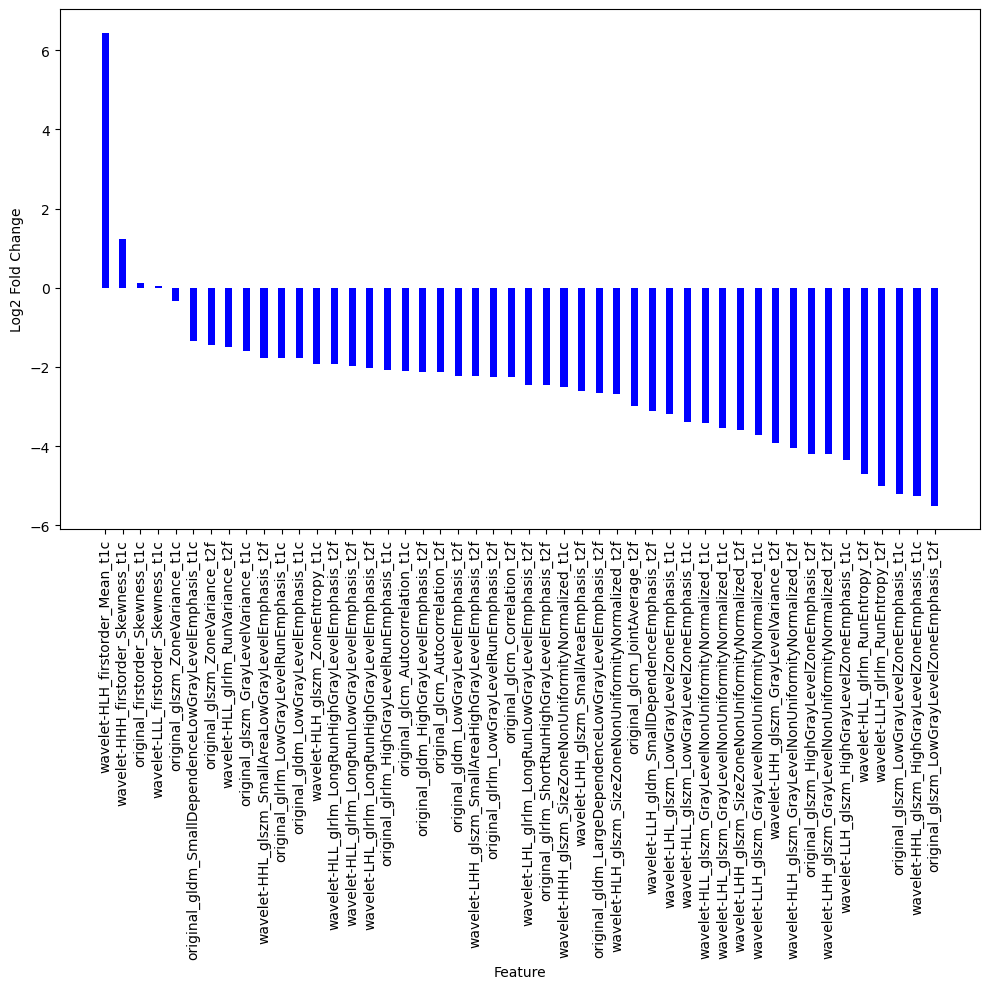

In [354]:
# plot fold changes in vals between grade 1 and grade 2 subs

plt.figure(figsize=(10,10))
plt.bar(feat_means['feature'],feat_means['log2_fc'], color = 'blue',width = 0.4)
plt.xticks(feat_means['feature'], rotation = 'vertical')
plt.xlabel('Feature')
plt.ylabel('Log2 Fold Change')
plt.tight_layout()

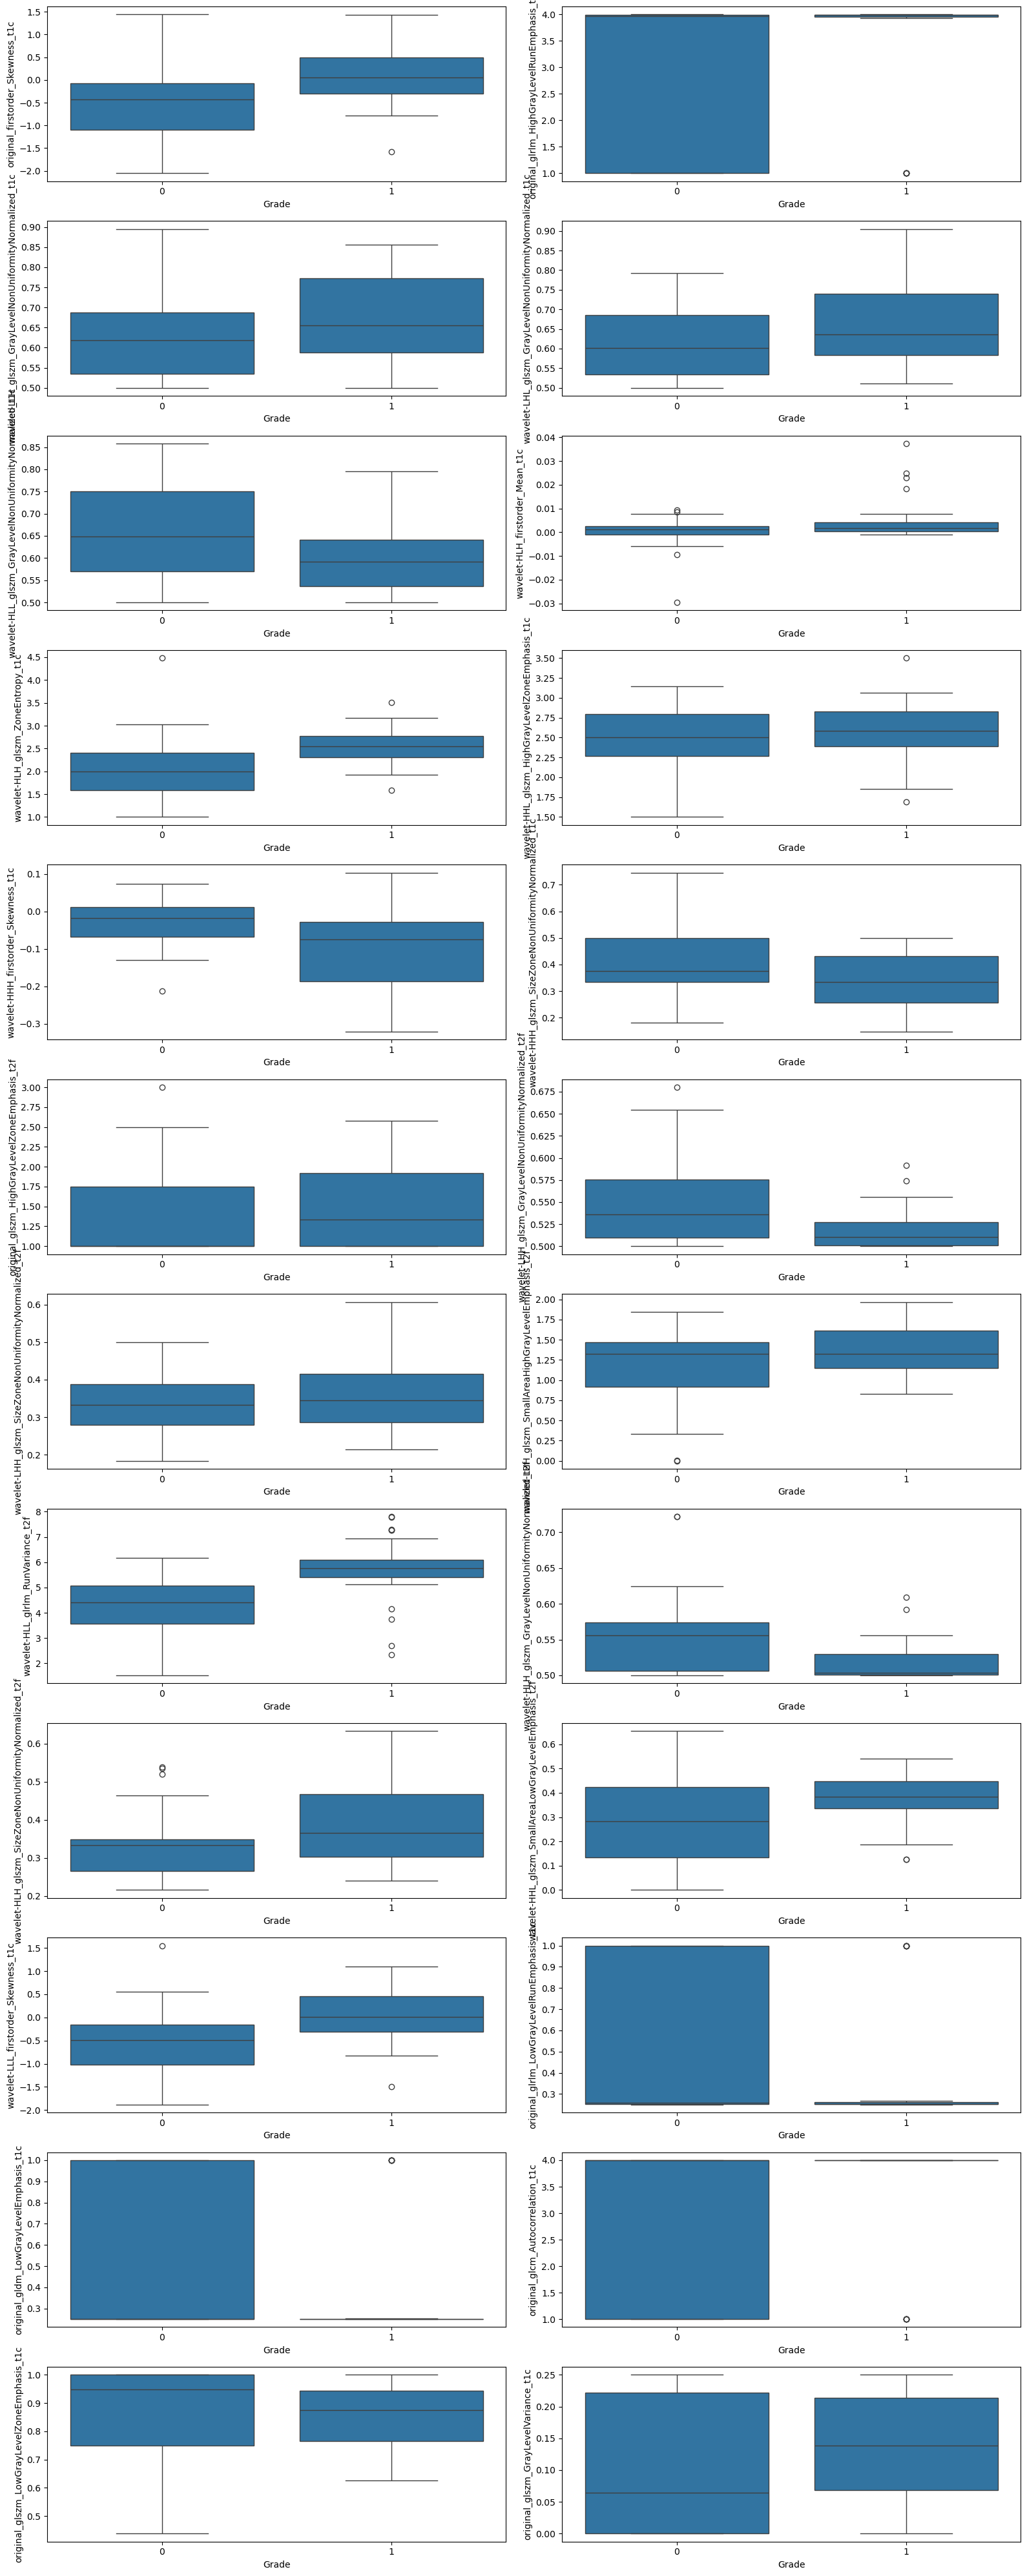

In [355]:
# get a list of the features
features=df_num_train.drop(columns=['Grade']).columns

# Define plotting region (13 rows, 2 columns)
fig, axes = plt.subplots(12, 2, figsize=(16, 40))

# Create boxplot in each subplot
for i, ax in enumerate(axes.flatten()):
    if i < (0.5 * len(features)):  # Ensure we don't exceed the number of features
        sns.boxplot(x=df_num_train['Grade'], y=df_num_train[features[i]], ax=ax)
    else:
        ax.set_axis_off()  # If there are fewer features than subplots, turn off the subplot

# Adjust layout
plt.tight_layout()

plt.show()

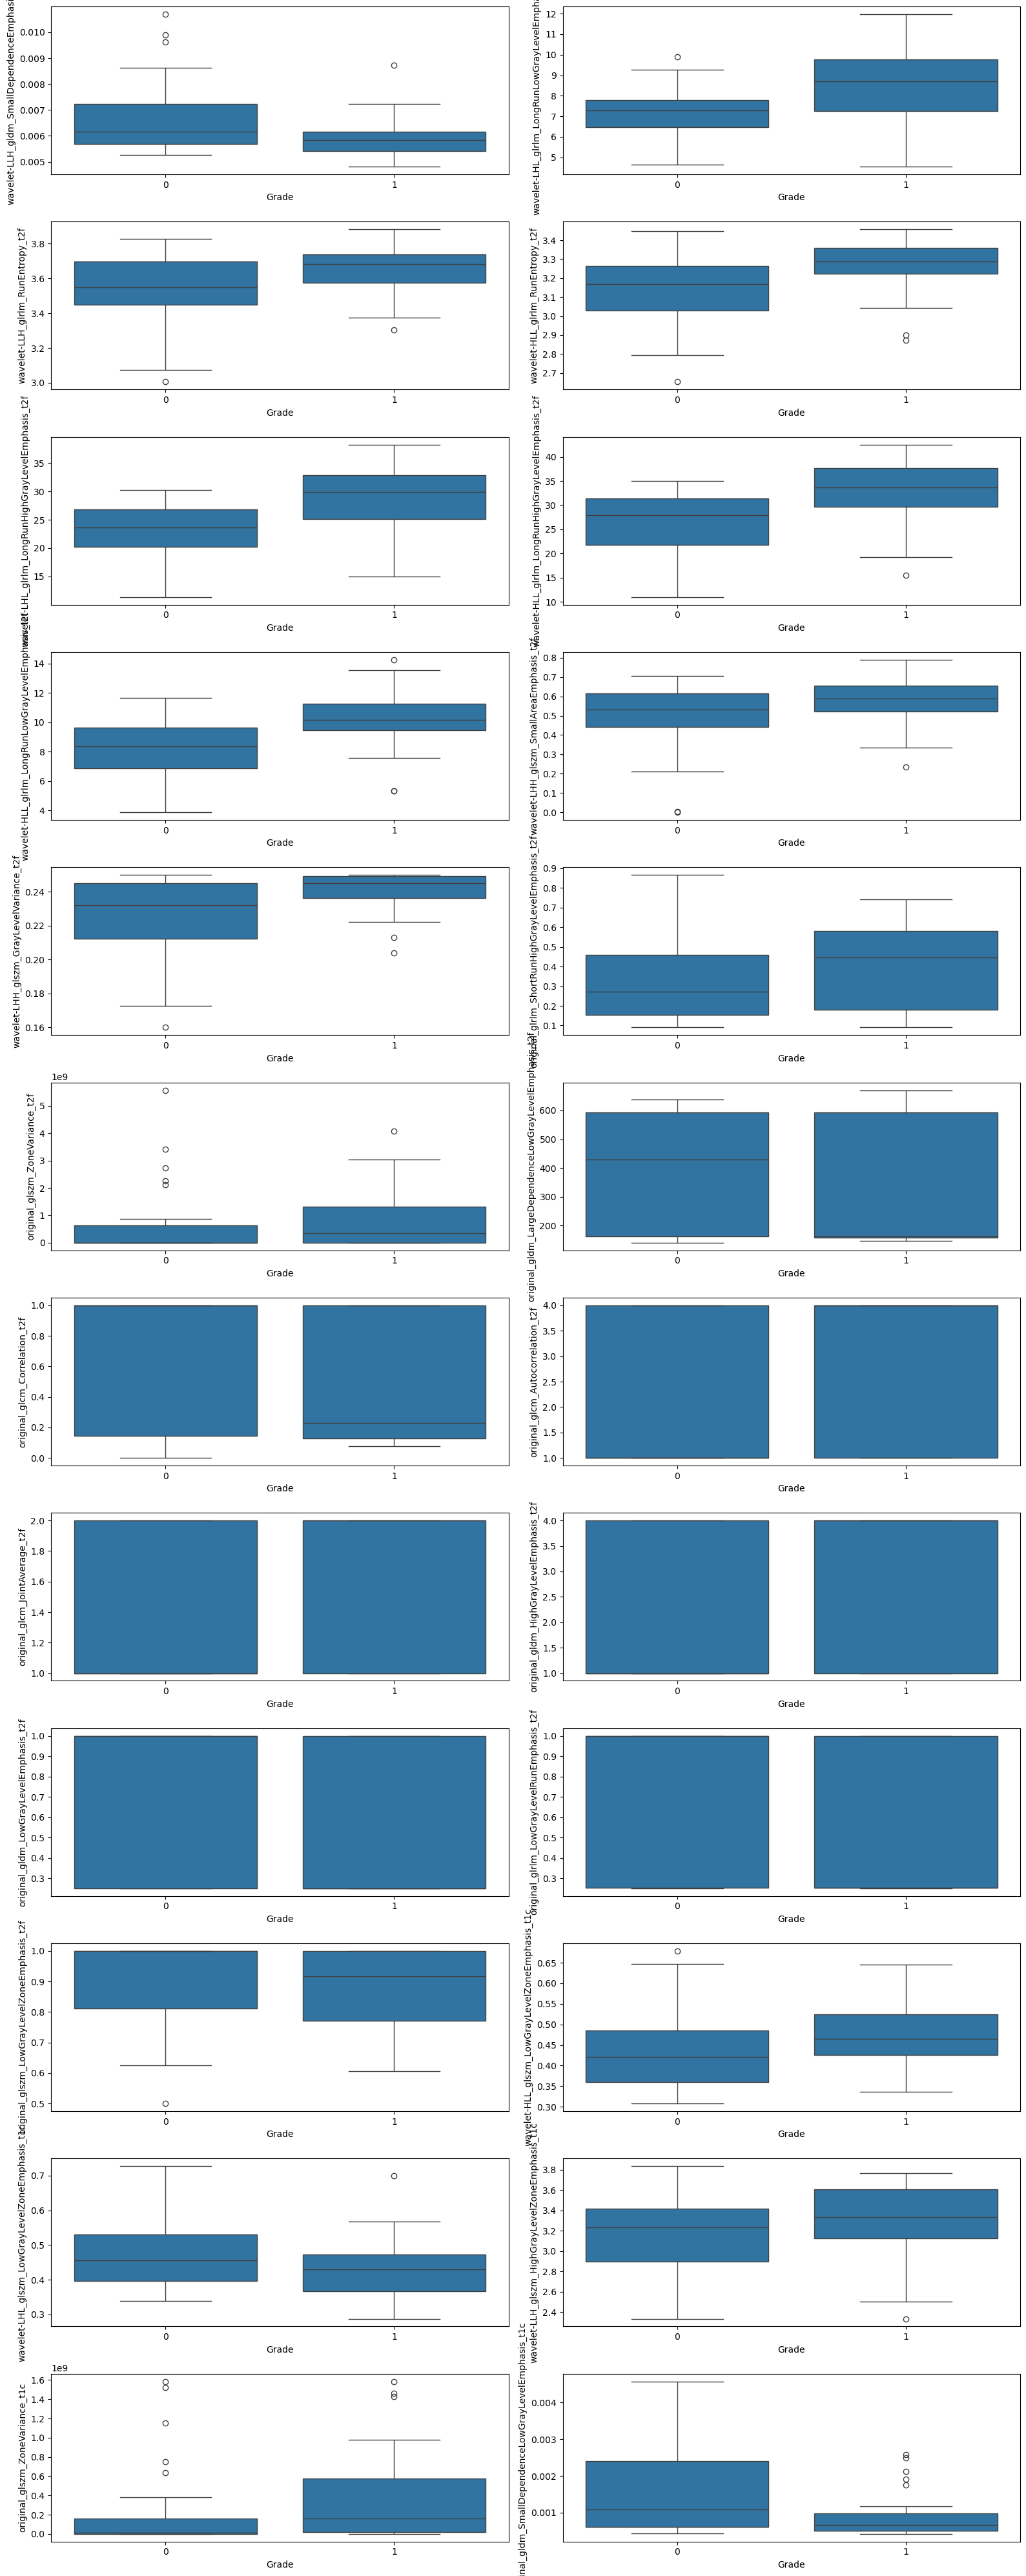

In [356]:
# Define plotting region (12 rows, 2 columns)

fig, axes = plt.subplots(12, 2, figsize=(16, 40))

# Create boxplot in each subplot
for i, ax in enumerate(axes.flatten()):
    if i < (0.5 * len(features)):  # Ensure we don't exceed the number of features
        sns.boxplot(x=df_num_train['Grade'], y=df_num_train[features[len(features)- (i+1)]], ax=ax)
    else:
        ax.set_axis_off()  # If there are fewer features than subplots, turn off the subplot

# Adjust layout
plt.tight_layout()

plt.show()

Hard to say what might be interesting features... IQR's overlap in all boxplots

### Check for class imbalance

Grade 0: 32
Grade 1: 26


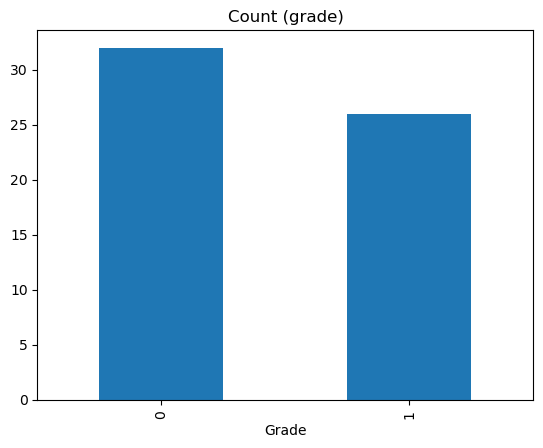

In [357]:
# count number of samples per class

target_count = df_num_train['Grade'].value_counts()
print('Grade 0:', target_count[0])
print('Grade 1:', target_count[1])

# plot results
df_num_train['Grade'].value_counts().plot(kind='bar', title='Count (grade)');

slight class imbalance but not major... SMOTE?

In [358]:
# look at percentage of each class to get a better feel at whether imbalanced
grade_0_perc = (target_count[0] / (target_count[0] + target_count[1]) * 100)

print('Grade 0:', grade_0_perc)

Grade 0: 55.172413793103445


# Feature selection

## Filter based method (Correlation)
### Correlation Analysis

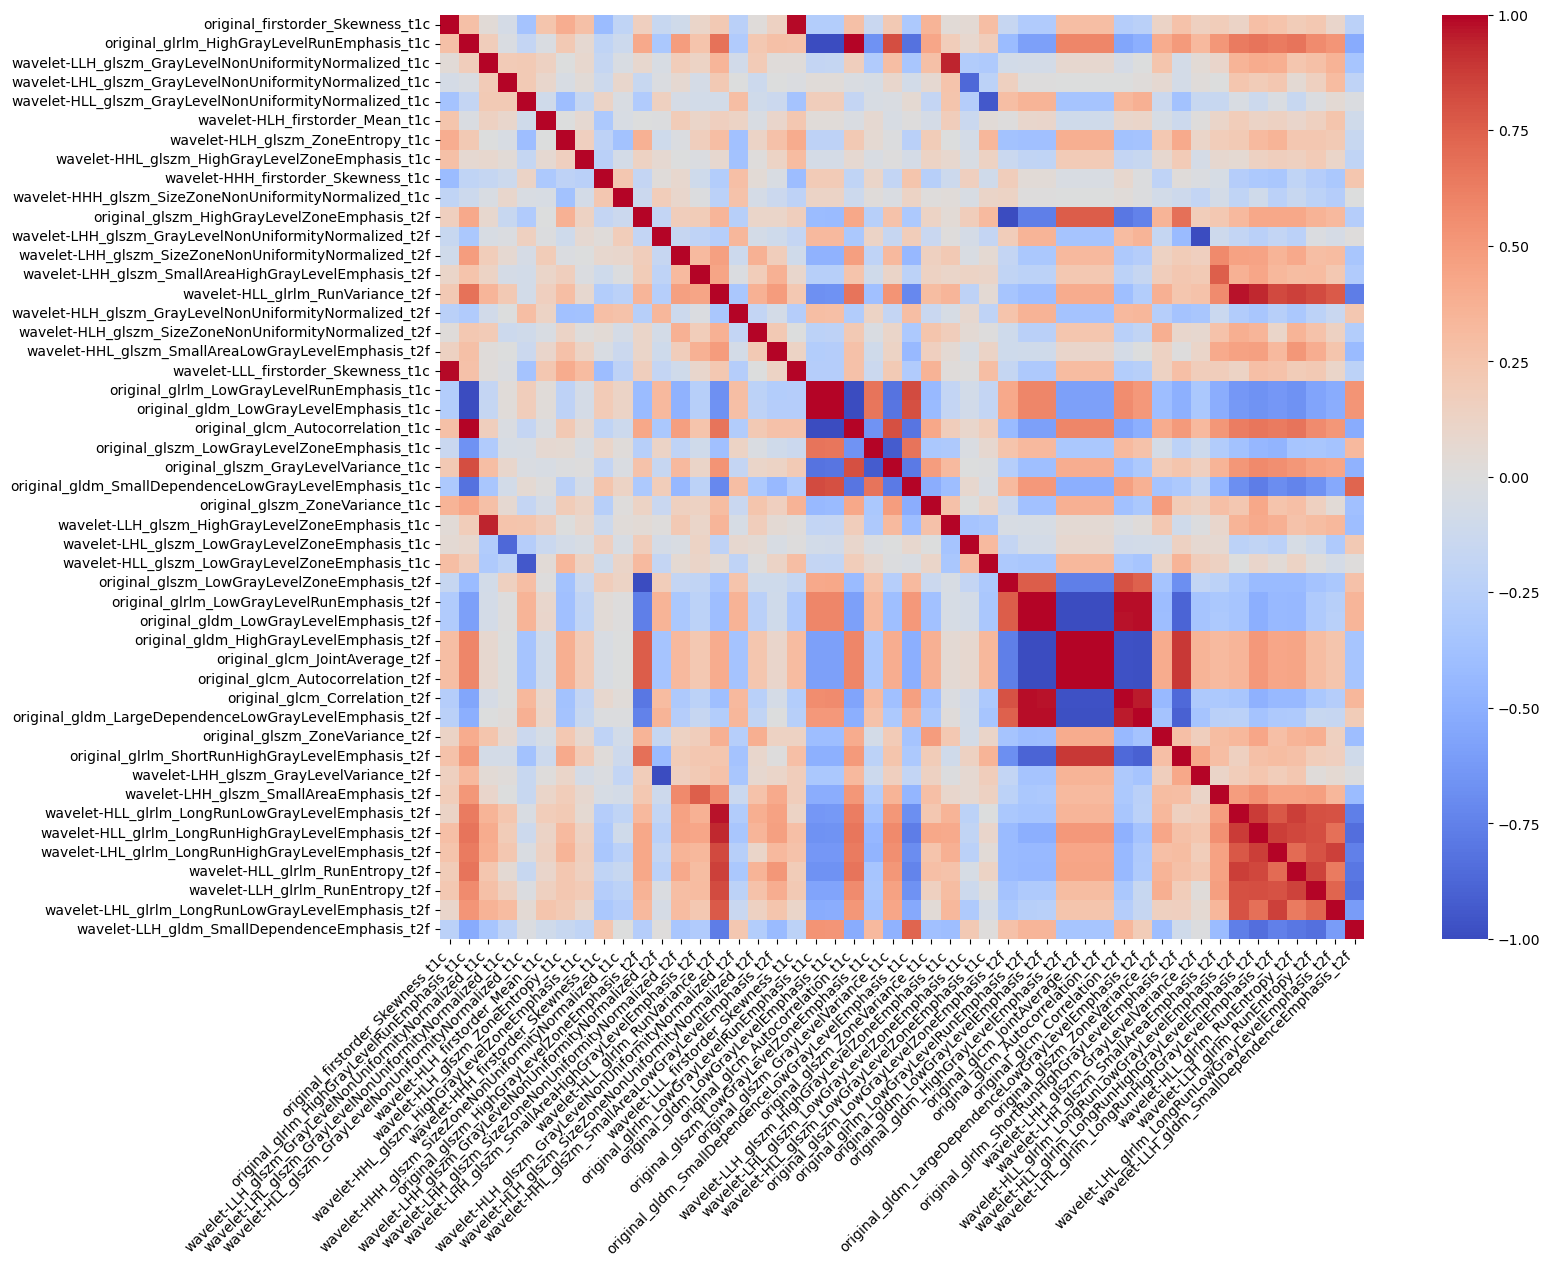

In [359]:
#first lets plot a heatmap of the correlation between features
corr = df_num_train.drop(columns=['Grade']).corr()
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

you can see that there are a lot of highly correlated features

In [360]:

# scale before any feature selection
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num_train)
X_train_scaled = scaler.transform(X_num_train)
X_test_scaled = scaler.transform(X_test)
df_num_train = pd.DataFrame(X_train_scaled, columns=X_num_train.columns)
df_num_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)


# set colinearity threshold
correlation_threshold=0.80 

# extract just the data without class label
#data=df_num_train.drop(columns=['Grade'])

# caluculate correlation matrix
corr_matrix = df_num_train.corr()

# extract the upper triangle of the correlation matrix -- inter-correlations or colinearity
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

# determine features that have a colinearity above threshold
# Need to use the absolute value -- to determine colineasrity
to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]
to_drop

# create a dataframe of correlated pairs
record_colinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])
# iterate through the cols to record pairs of correlated features
for column in to_drop:

    # fid the correlated features
    corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

    # find the correlated values
    corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
    drop_features = [column for _ in range(len(corr_features))]

    # record the information (need a temp df)
    temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                      'corr_feature': corr_features,
                                      'corr_value': corr_values})
    
    # add to dataframe
    record_colinear = pd.concat([record_colinear, temp_df], ignore_index=True)

# sort collinearity
colinear = record_colinear.sort_values(by='corr_value', ascending=False)

# display to 20 to show how some of these are highly correlated
# meaning we can drop a feature but keep the one it is highly correlated with
colinear.head(5)


/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_78135/1514514403.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  record_colinear = pd.concat([record_colinear, temp_df], ignore_index=True)


drop_feature  \
25          original_glcm_JointAverage_t2f   
29       original_glcm_Autocorrelation_t2f   
28       original_glcm_Autocorrelation_t2f   
20  original_gldm_LowGrayLevelEmphasis_t2f   
4        original_glcm_Autocorrelation_t1c   

                                   corr_feature  corr_value  
25      original_gldm_HighGrayLevelEmphasis_t2f    1.000000  
29               original_glcm_JointAverage_t2f    1.000000  
28      original_gldm_HighGrayLevelEmphasis_t2f    1.000000  
20   original_glrlm_LowGrayLevelRunEmphasis_t2f    0.999912  
4   original_glrlm_HighGrayLevelRunEmphasis_t1c    0.999658

### Removing from dataset

In [361]:
print("Features that will be dropped from the dataset:")
for feature in to_drop:
    print("- {}".format(feature))

Features that will be dropped from the dataset:
- wavelet-LLL_firstorder_Skewness_t1c
- original_glrlm_LowGrayLevelRunEmphasis_t1c
- original_gldm_LowGrayLevelEmphasis_t1c
- original_glcm_Autocorrelation_t1c
- original_glszm_GrayLevelVariance_t1c
- original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c
- wavelet-LLH_glszm_HighGrayLevelZoneEmphasis_t1c
- wavelet-LHL_glszm_LowGrayLevelZoneEmphasis_t1c
- wavelet-HLL_glszm_LowGrayLevelZoneEmphasis_t1c
- original_glszm_LowGrayLevelZoneEmphasis_t2f
- original_gldm_LowGrayLevelEmphasis_t2f
- original_gldm_HighGrayLevelEmphasis_t2f
- original_glcm_JointAverage_t2f
- original_glcm_Autocorrelation_t2f
- original_glcm_Correlation_t2f
- original_gldm_LargeDependenceLowGrayLevelEmphasis_t2f
- original_glrlm_ShortRunHighGrayLevelEmphasis_t2f
- wavelet-LHH_glszm_GrayLevelVariance_t2f
- wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f
- wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f
- wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f
- wavelet-HL

In [362]:
# create a processed dataset after removing features
processed_df_train = df_num_train.drop(columns=to_drop)
processed_df_test = df_num_test.drop(columns=to_drop)
print(processed_df_train.shape, processed_df_test.shape)

(58, 23) (29, 23)


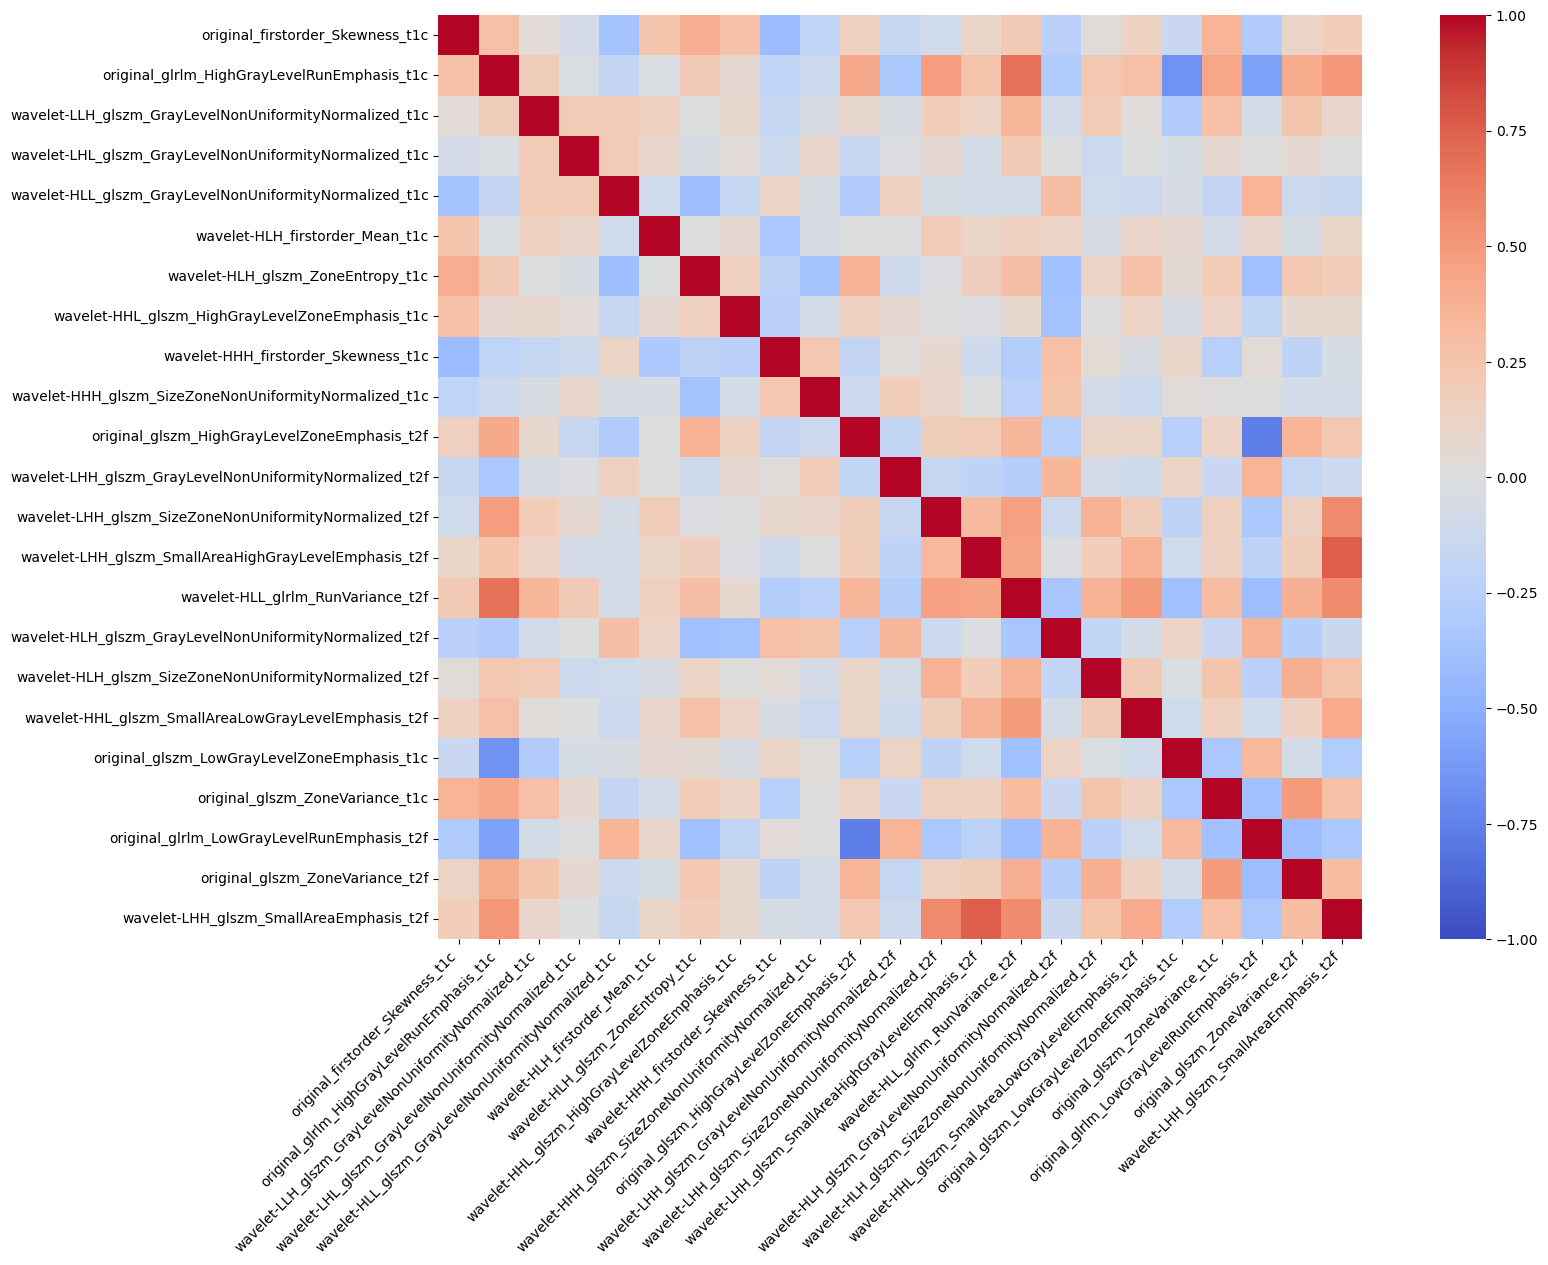

In [363]:
#now look again at heatmap of the correlation between features
corr = processed_df_train.corr()
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [364]:
# find percentage dimensionality reduction
reduction = (df_num_train.shape[1] - processed_df_train.shape[1]) / df_num_train.shape[1]
no_removed = df_num_train.shape[1] - processed_df_test.shape[1]
print("Number of features selected: ", processed_df_train.shape[1])
print("Percentage dimensionality reduction: {:.2%}".format(reduction))
print("Number of features removed: ", no_removed)

Number of features selected:  23
Percentage dimensionality reduction: 52.08%
Number of features removed:  25


In [365]:
#convert y from series to DF for ease later on 
y_train_df, y_test_df = pd.DataFrame(y_train, columns = ['Grade']), pd.DataFrame(y_test, columns = ['Grade'])

## Embedded or Wrapper method?

### LASSO

In [366]:
# starting from the dataset before correlation analysis
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold


params = {"alpha":np.arange(0.00001, 10, 500)}

# number of folds and adding the random state for replication
kf = KFold(n_splits=5,shuffle=True, random_state=42)

# initializing the model
lasso = Lasso()

# GridSearchCV with model, params and folds
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X_train_scaled, y_train)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e-01, tolerance: 1.150e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.376e-01, tolerance: 1.115e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

In [367]:
names=X_num_train.columns
print("Column Names: {}".format(names.values))

Column Names: ['original_firstorder_Skewness_t1c'
 'original_glrlm_HighGrayLevelRunEmphasis_t1c'
 'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-HLH_firstorder_Mean_t1c' 'wavelet-HLH_glszm_ZoneEntropy_t1c'
 'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c'
 'wavelet-HHH_firstorder_Skewness_t1c'
 'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c'
 'original_glszm_HighGrayLevelZoneEmphasis_t2f'
 'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f'
 'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f'
 'wavelet-HLL_glrlm_RunVariance_t2f'
 'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f'
 'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f'
 'wavelet-LLL_firstorder_Skewness_t1c'
 'original_glrlm_LowGrayLevelRunEmphasis_t1c'


/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.595e+00, tolerance: 1.434e-03
  model = cd_fast.enet_coordinate_descent(


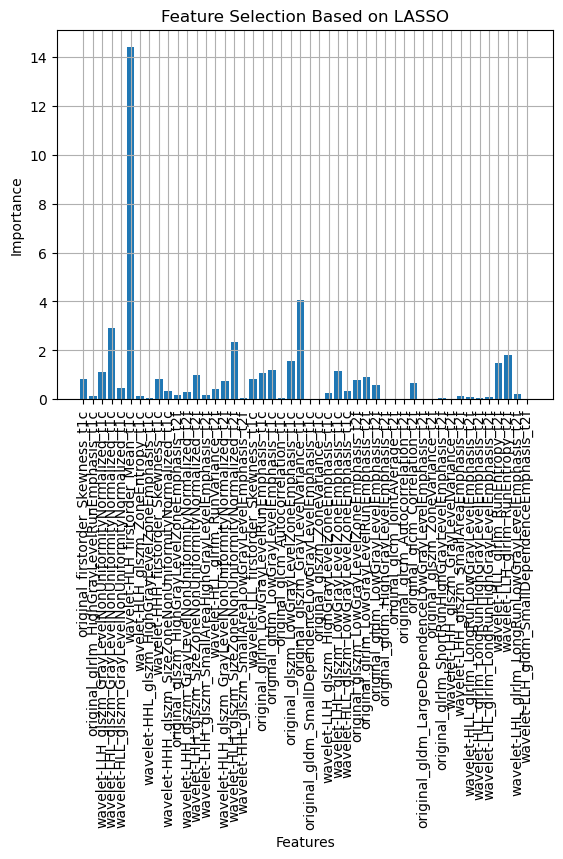

In [368]:
#using LASSO regressor to plot the best features

# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_num_train, y_train)

# using np.abs() to make coefficients positive
lasso1_coef = np.abs(lasso1.coef_)

# plotting the col names and importance
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.title("Feature Selection Based on LASSO")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.grid()
plt.show()

In [369]:
#subsetting the features which has more than 0.001 importance
feature_subset=np.array(names)[lasso1_coef>0.001]
print("Selected Feature Columns: {}".format(feature_subset))
print("Number of features selected: {}".format(feature_subset.shape[0]))
reduction = (X_num_train.shape[1] - feature_subset.shape[0]) / X_num_train.shape[1]
print("Percentage dimensionality reduction: {:.2%}".format(reduction))

Selected Feature Columns: ['original_firstorder_Skewness_t1c'
 'original_glrlm_HighGrayLevelRunEmphasis_t1c'
 'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-HLH_firstorder_Mean_t1c' 'wavelet-HLH_glszm_ZoneEntropy_t1c'
 'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c'
 'wavelet-HHH_firstorder_Skewness_t1c'
 'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c'
 'original_glszm_HighGrayLevelZoneEmphasis_t2f'
 'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f'
 'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f'
 'wavelet-HLL_glrlm_RunVariance_t2f'
 'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f'
 'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f'
 'wavelet-LLL_firstorder_Skewness_t1c'
 'original_glrlm_LowGrayLevelRunEm

## Combining Selected Features

In [370]:
# first see if any features dropped during LASSO are in the dataset we were left with after correlation analysis

# features that were dropped in LASSO
dropped_lasso = [feature for feature in names if feature not in feature_subset]

# get a list of feature names from processed_df
corr_names = processed_df_train.columns

# check if any dropped features are in corr_names
dropped_corr = [feature for feature in dropped_lasso if feature not in corr_names]
dropped_corr

['original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c',
 'original_glcm_JointAverage_t2f',
 'original_glcm_Autocorrelation_t2f',
 'wavelet-LHH_glszm_GrayLevelVariance_t2f',
 'wavelet-LLH_gldm_SmallDependenceEmphasis_t2f']

Best Params: {'alpha': 1e-05}


Text(0, 0.5, 'Importance')

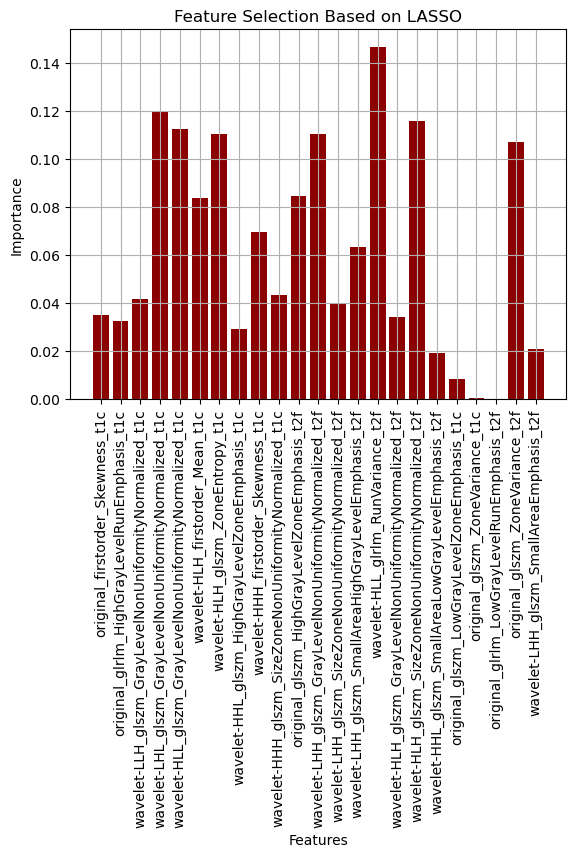

In [371]:
# try lasso on the dataset with highly correlated features removed

lasso_cv_2=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv_2.fit(processed_df_train, y_train_df)
print("Best Params: {}".format(lasso_cv_2.best_params_))

# calling the model with the best parameter
lasso2=Lasso(alpha=0.00001)
lasso2.fit(processed_df_train, y_train_df)

# using np.abs() to make coeffeicients positive
lasso2_coef = np.abs(lasso2.coef_)

corr_names = processed_df_train.columns
# plotting the col names and importancw
plt.bar(corr_names, lasso2_coef, color = 'darkred')
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on LASSO")
plt.xlabel("Features")
plt.ylabel("Importance")

In [372]:
feature_subset_2=np.array(corr_names)[lasso2_coef>0.001]
print("Selected Features: {}".format(feature_subset_2))
print("Number of Features: {}".format(feature_subset_2.shape[0]))
reduction = (processed_df_train.shape[1] - feature_subset_2.shape[0]) / processed_df_train.shape[1]
print("Percentage dimensionality reduction (from after removing highly collinear features): {:.2%}".format(reduction))
df_lasso_train = processed_df_train[feature_subset_2]
df_lasso_test = processed_df_test[feature_subset_2]

Selected Features: ['original_firstorder_Skewness_t1c'
 'original_glrlm_HighGrayLevelRunEmphasis_t1c'
 'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-HLH_firstorder_Mean_t1c' 'wavelet-HLH_glszm_ZoneEntropy_t1c'
 'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c'
 'wavelet-HHH_firstorder_Skewness_t1c'
 'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c'
 'original_glszm_HighGrayLevelZoneEmphasis_t2f'
 'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f'
 'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f'
 'wavelet-HLL_glrlm_RunVariance_t2f'
 'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f'
 'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f'
 'original_glszm_LowGrayLevelZoneEmphasis_t1c'
 'original_glszm_ZoneVariance_t2f

## Using RFE

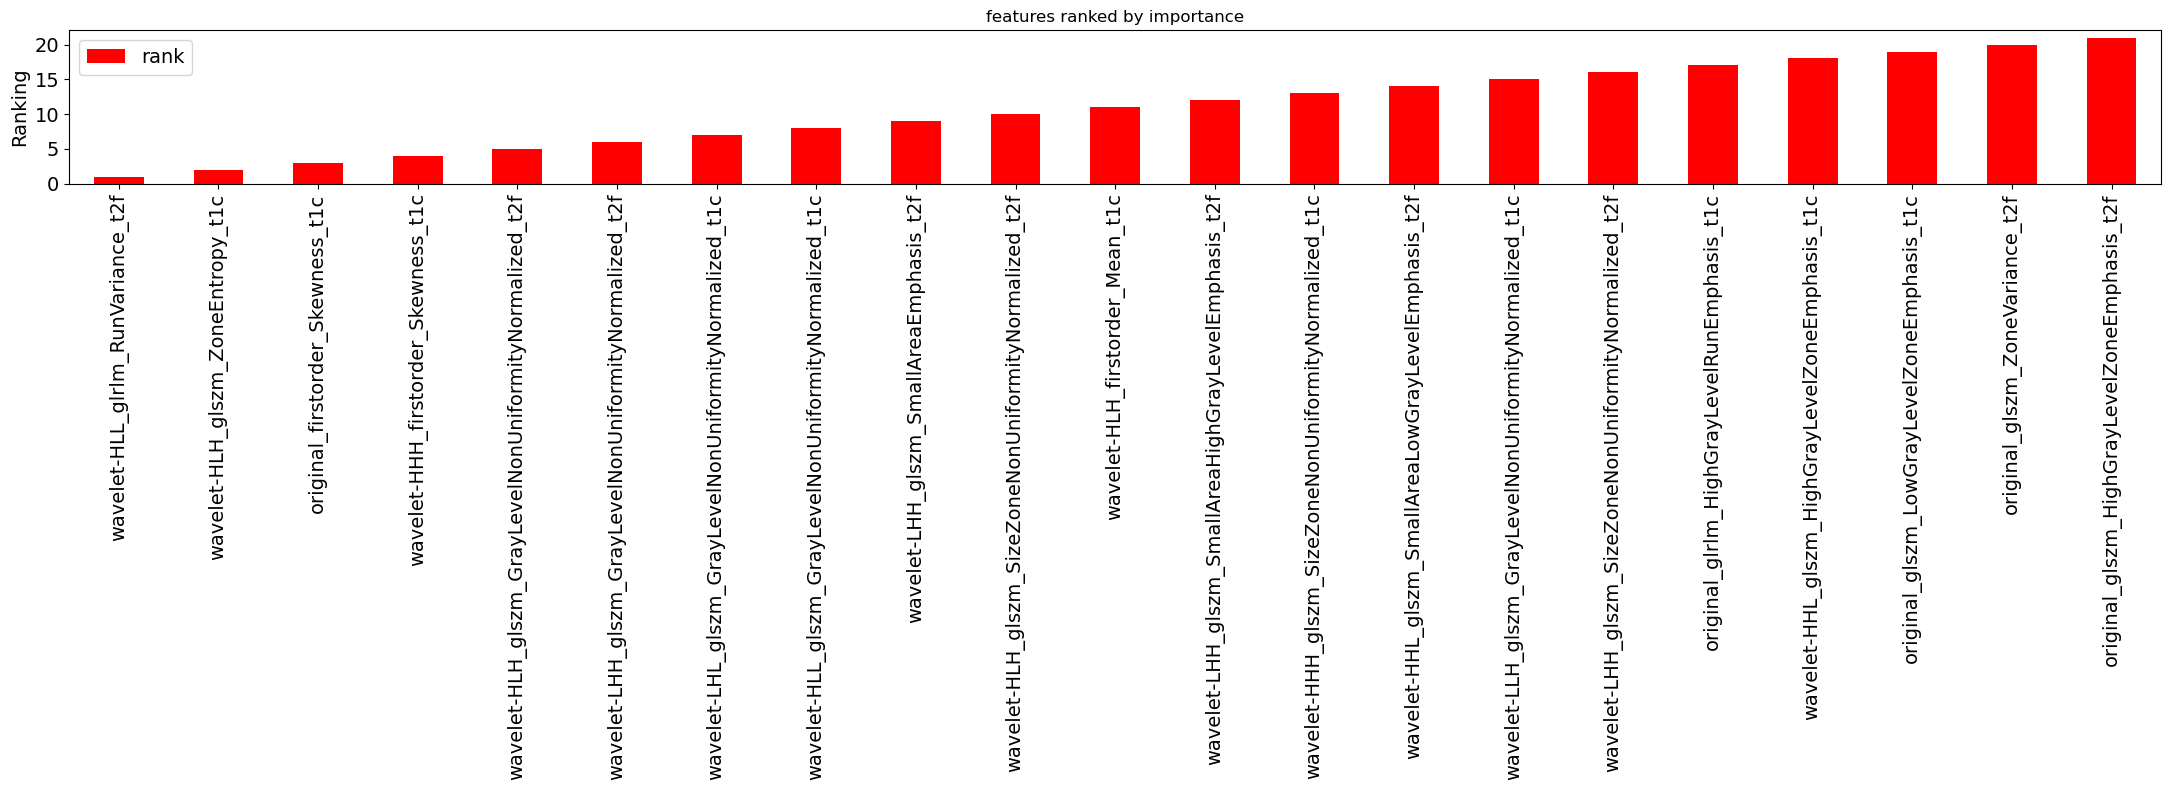

In [373]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

data, target=df_lasso_train, y_train
estimator=RandomForestClassifier(random_state=20)
rfe = RFE(estimator, n_features_to_select=1).fit(data, target)
rf_ranking=rfe.ranking_
features=data.columns

rfe_feature_ranking=pd.DataFrame({'feature': features, 'rank':rf_ranking})

ranked_ref=pd.DataFrame({'feature': features, 'rank':rf_ranking}).sort_values(by=['rank'])
ranked_ref.plot.bar(x='feature', y='rank', rot=0,figsize=(22,8), color='red')
plt.xticks(rotation='vertical',fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Ranking',fontsize=14) 
plt.legend(fontsize=14)
plt.title("features ranked by importance")
plt.tight_layout()

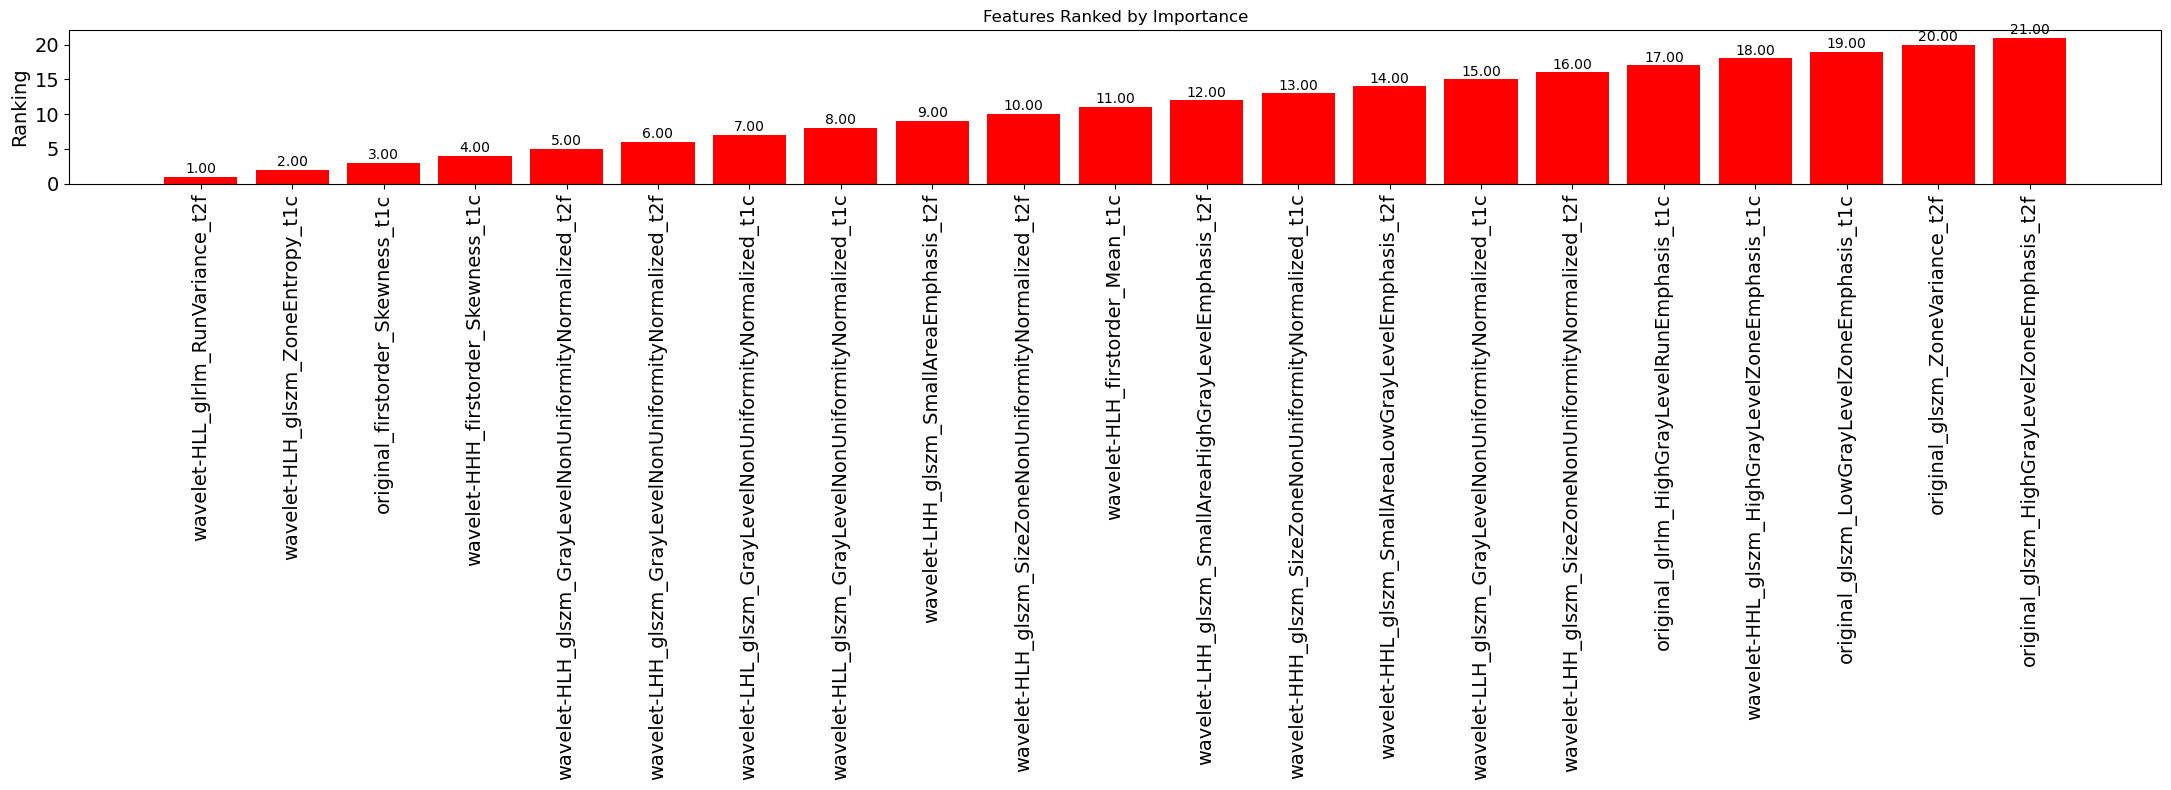

In [374]:

# Sort the DataFrame by ranking
ranked_ref_sorted = ranked_ref.sort_values(by='rank')

# Plotting
plt.figure(figsize=(22, 8))
bars = plt.bar(ranked_ref_sorted['feature'], ranked_ref_sorted['rank'], color='red')

# Adjusting the height of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', va='bottom')

plt.xticks(rotation='vertical', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Ranking', fontsize=14)
plt.title("Features Ranked by Importance")
plt.tight_layout()
plt.show()


features with LOWER ranking are more important... first feature most important.

In [375]:
rfe_feature_ranking.sort_values(by = ['rank'])

feature  rank
14                  wavelet-HLL_glrlm_RunVariance_t2f     1
6                   wavelet-HLH_glszm_ZoneEntropy_t1c     2
0                    original_firstorder_Skewness_t1c     3
8                 wavelet-HHH_firstorder_Skewness_t1c     4
15  wavelet-HLH_glszm_GrayLevelNonUniformityNormal...     5
11  wavelet-LHH_glszm_GrayLevelNonUniformityNormal...     6
3   wavelet-LHL_glszm_GrayLevelNonUniformityNormal...     7
4   wavelet-HLL_glszm_GrayLevelNonUniformityNormal...     8
20            wavelet-LHH_glszm_SmallAreaEmphasis_t2f     9
16  wavelet-HLH_glszm_SizeZoneNonUniformityNormali...    10
5                     wavelet-HLH_firstorder_Mean_t1c    11
13  wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphas...    12
9   wavelet-HHH_glszm_SizeZoneNonUniformityNormali...    13
17  wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasi...    14
2   wavelet-LLH_glszm_GrayLevelNonUniformityNormal...    15
12  wavelet-LHH_glszm_SizeZoneNonUniformityNormali...    16
1         original_glrlm_HighGrayLevelRunEmphasis_t1c    17
7     wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c    18
18        original_glszm_LowGrayLevelZoneEmphasis_t1c    19
19                    original_glszm_ZoneVariance_t2f    20
10       original_glszm_HighGrayLevelZoneEmphasis_t2f    21

In [376]:
from sklearn.feature_selection import RFECV

# feature selector
selector = RFECV(estimator, step=1, cv=5)

# fit
selector = selector.fit(df_lasso_train, y_train)

# create a features ranking df and show wich are highest ranked features
features = df_lasso_train.columns
feature_ranking = pd.DataFrame({'feature':features, 'rank':selector.ranking_}).sort_values(by='rank', ascending=True)
print(feature_ranking.head(10))

                                              feature  rank
0                    original_firstorder_Skewness_t1c     1
15  wavelet-HLH_glszm_GrayLevelNonUniformityNormal...     1
14                  wavelet-HLL_glrlm_RunVariance_t2f     1
6                   wavelet-HLH_glszm_ZoneEntropy_t1c     1
8                 wavelet-HHH_firstorder_Skewness_t1c     1
11  wavelet-LHH_glszm_GrayLevelNonUniformityNormal...     2
3   wavelet-LHL_glszm_GrayLevelNonUniformityNormal...     3
4   wavelet-HLL_glszm_GrayLevelNonUniformityNormal...     4
20            wavelet-LHH_glszm_SmallAreaEmphasis_t2f     5
16  wavelet-HLH_glszm_SizeZoneNonUniformityNormali...     6


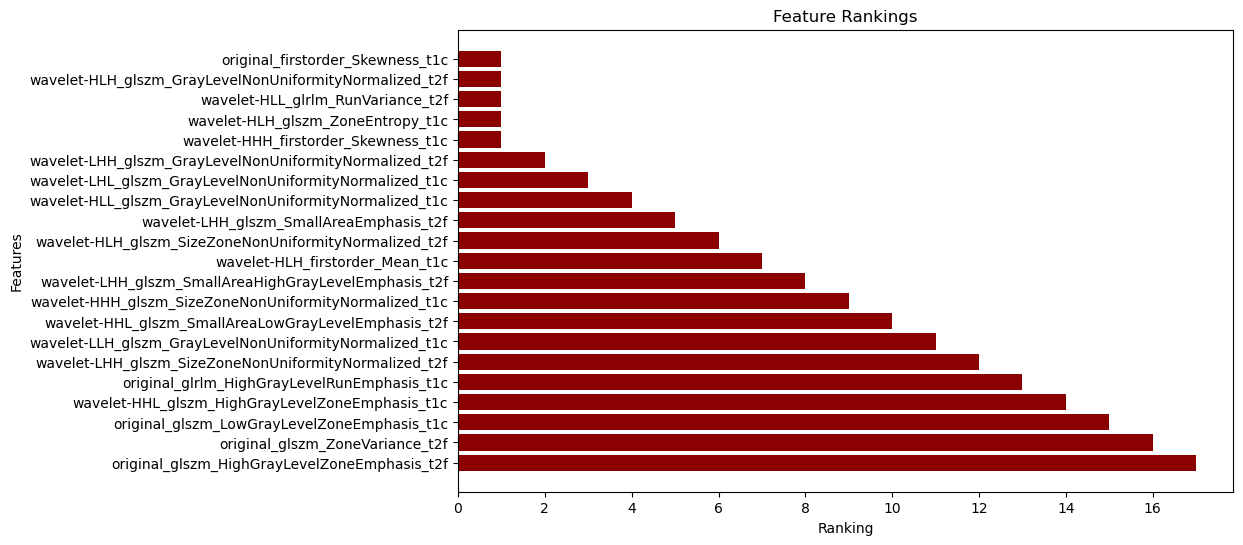

In [377]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['feature'], feature_ranking['rank'], color='darkred')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('Feature Rankings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ranked features on top
plt.show()

In [378]:
# now select only features with ranking 1
selected_features=feature_ranking[feature_ranking['rank']==1].feature
selected_features

0                      original_firstorder_Skewness_t1c
15    wavelet-HLH_glszm_GrayLevelNonUniformityNormal...
14                    wavelet-HLL_glrlm_RunVariance_t2f
6                     wavelet-HLH_glszm_ZoneEntropy_t1c
8                   wavelet-HHH_firstorder_Skewness_t1c
Name: feature, dtype: object

In [430]:
# create a data frame with only the most significant features to move forward with
X_final_train = df_lasso_train[selected_features]
X_final_test = df_lasso_test[selected_features]

f_new_reduction = (df_lasso_train.shape[1] - X_final_train.shape[1]) / (df_lasso_train.shape[1])
f_reduction = (X_train.shape[1] - X_final_train.shape[1]) / (X_train.shape[1])
print("Total percentage dimensionality reduction: {:.2%}".format(f_reduction))
print("Further percentage dimensionality reduction: {:.2%}".format(f_new_reduction))
print("Final training DF shape: {}".format(X_final_train.shape))
print("Final features: ", selected_features.values)


Total percentage dimensionality reduction: 89.80%
Further percentage dimensionality reduction: 76.19%
Final training DF shape: (58, 5)
Final features:  ['original_firstorder_Skewness_t1c'
 'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-HLL_glrlm_RunVariance_t2f' 'wavelet-HLH_glszm_ZoneEntropy_t1c'
 'wavelet-HHH_firstorder_Skewness_t1c']


# Model Selection
## Using accuracy

Calculating accuracies
LR: 0.860000 (0.127192)
LDA: 0.843333 (0.118369)
KNN: 0.723333 (0.154955)
DT: 0.770000 (0.199694)
GNB: 0.776667 (0.128279)
SVM: 0.706667 (0.108321)
RF: 0.810000 (0.189180)
BG: 0.760000 (0.211765)
ET: 0.773333 (0.155492)
SGDC: 0.723333 (0.227572)
NN: 0.743333 (0.183818)


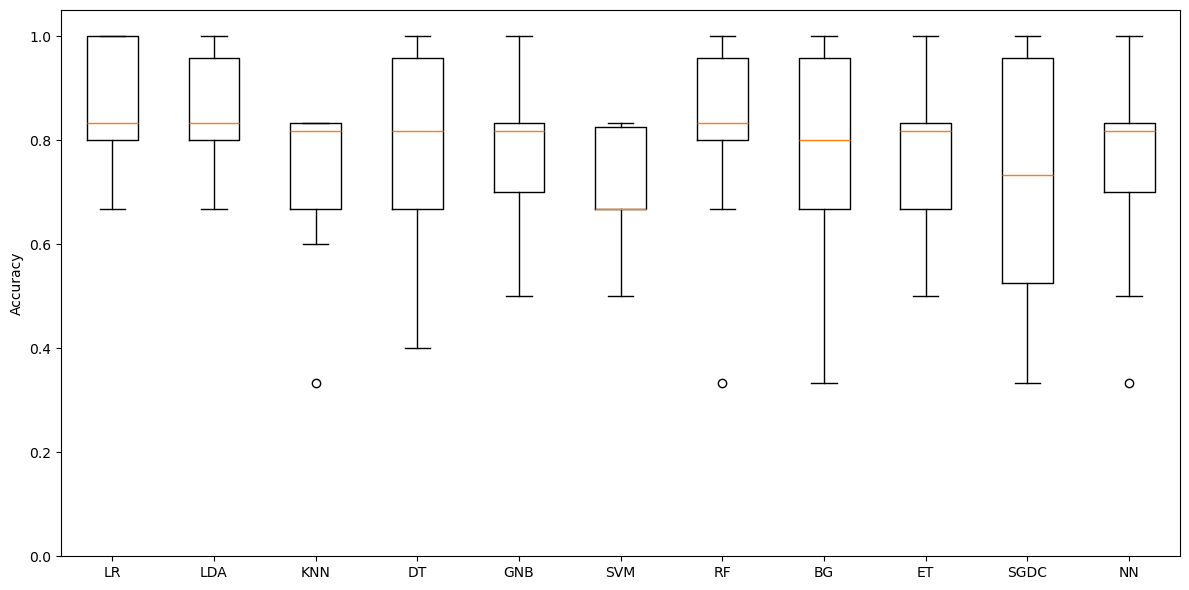

In [380]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import StratifiedKFold

# prepare configuration for cross validation test harness

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(kernel='poly')))
models.append(('RF', RandomForestClassifier()))
models.append(('BG', BaggingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('SGDC', SGDClassifier()))
models.append(('NN', Perceptron()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# sort the data and labels
X=X_final_train
y=y_train_df
Y=np.ravel(y)

# Accuracy
print('Calculating accuracies')
for name, model in models:
    #using stratified due to slight class imalanc rather than use SMOTE on such a small dataset
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,6))
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.ylim(0.0,1.05)
#plt.grid()
plt.tight_layout()

LR, LDA, RF

## Using AUC

Calculating AUCs
LR: 0.877778 (0.180534)
LDA: 0.877778 (0.180534)
KNN: 0.814583 (0.176942)
DT: 0.754167 (0.240406)
GNB: 0.841667 (0.132666)
SVM: 0.841667 (0.173049)
RF: 0.916667 (0.167129)
BG: 0.869444 (0.193270)
ET: 0.904167 (0.131827)
SGDC: 0.872222 (0.182659)
NN: 0.797222 (0.227048)


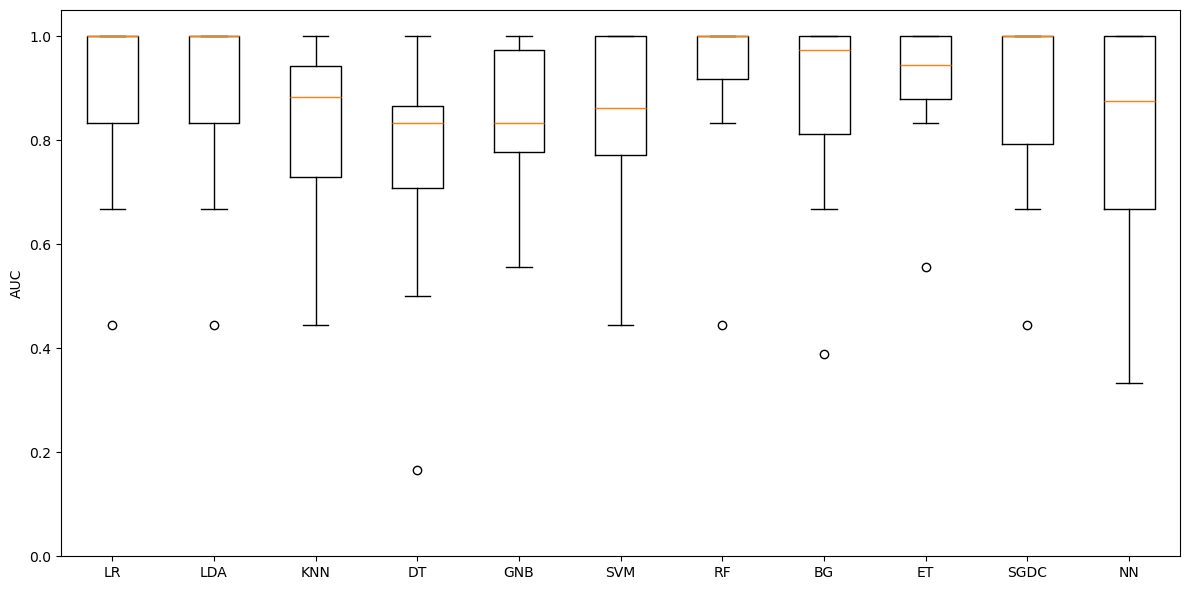

In [381]:
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

# AUC 
print('Calculating AUCs')
for name, model in models:
    #using stratified due to slight class imalanc rather than use SMOTE on such a small dataset
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,6))
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('AUC')
plt.ylim(0.0,1.05)
#plt.grid()
plt.tight_layout()

LR, LDA, RF, BG

## Using F1 Score

Calculating F1 Scores
LR: 0.836667 (0.159478)
LDA: 0.816667 (0.150000)
KNN: 0.680000 (0.164789)
DT: 0.827619 (0.144903)
GNB: 0.770476 (0.109126)
SVM: 0.546667 (0.231517)
RF: 0.810000 (0.229032)
BG: 0.818095 (0.204105)
ET: 0.770000 (0.179165)
SGDC: 0.781667 (0.160286)
NN: 0.680000 (0.277769)


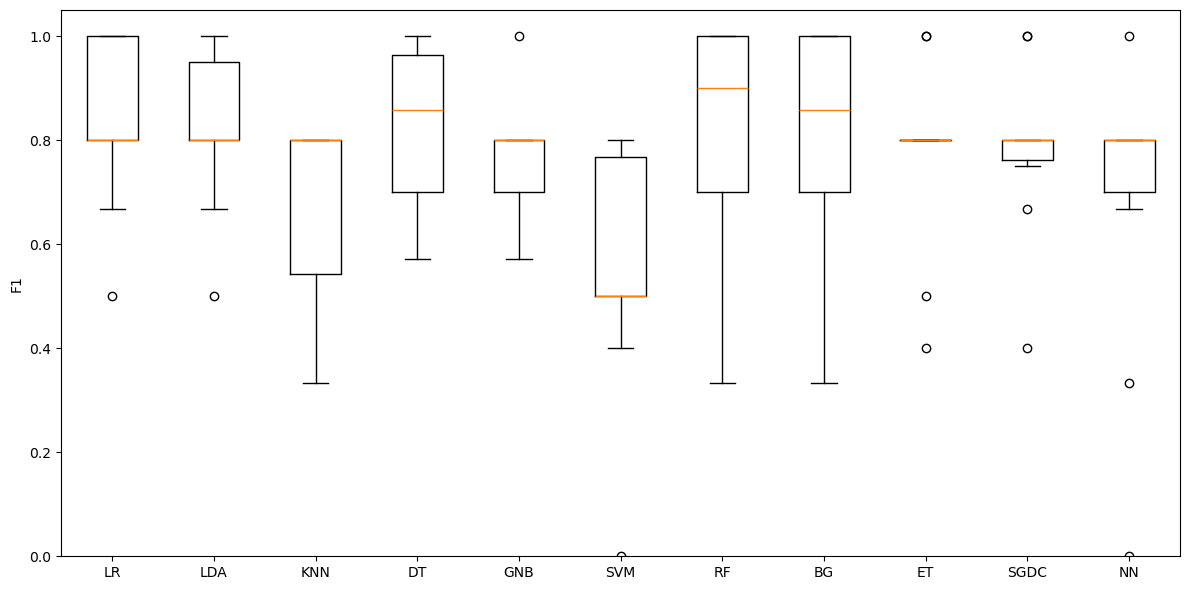

In [382]:
# evaluate each model in turn
results = []
names = []
scoring = 'f1'

# AUC 
print('Calculating F1 Scores')
for name, model in models:
    #using stratified due to slight class imalanc rather than use SMOTE on such a small dataset
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,6))
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('F1')
plt.ylim(0.0,1.05)
#plt.grid()
plt.tight_layout()

RF, BG

## Using Precision

Calculating Precisions
LR: 0.866667 (0.163299)
LDA: 0.833333 (0.166667)
KNN: 0.750000 (0.226691)
DT: 0.741667 (0.195256)
GNB: 0.750000 (0.170783)
SVM: 0.766667 (0.326599)


/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF: 0.816667 (0.240947)
BG: 0.833333 (0.210819)
ET: 0.833333 (0.210819)
SGDC: 0.643333 (0.293277)
NN: 0.666667 (0.298142)


/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


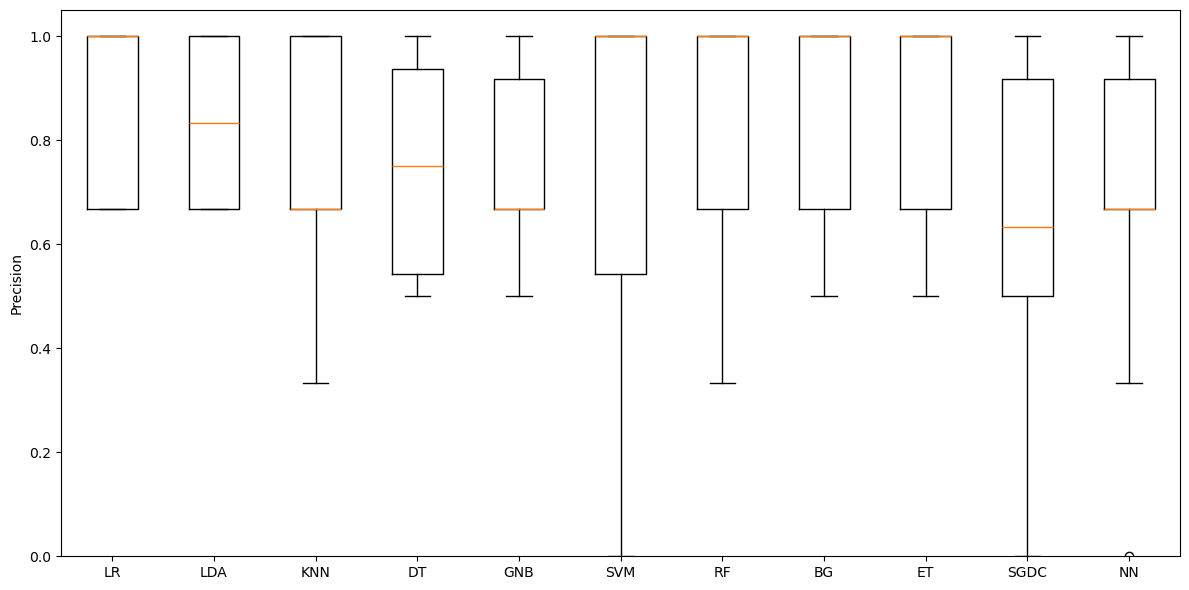

In [383]:
# evaluate each model in turn
results = []
names = []
scoring = 'precision'

# AUC 
print('Calculating Precisions')
for name, model in models:
    #using stratified due to slight class imalanc rather than use SMOTE on such a small dataset
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,6))
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Precision')
plt.ylim(0.0,1.05)
#plt.grid()
plt.tight_layout()

LR, SVM, RF, ET

## Using Recall

Calculating Recalls
LR: 0.866667 (0.221108)
LDA: 0.866667 (0.221108)
KNN: 0.683333 (0.240947)
DT: 0.916667 (0.170783)
GNB: 0.833333 (0.166667)
SVM: 0.466667 (0.256038)
RF: 0.866667 (0.221108)
BG: 0.816667 (0.189297)
ET: 0.716667 (0.258736)
SGDC: 0.716667 (0.298608)
NN: 0.733333 (0.326599)


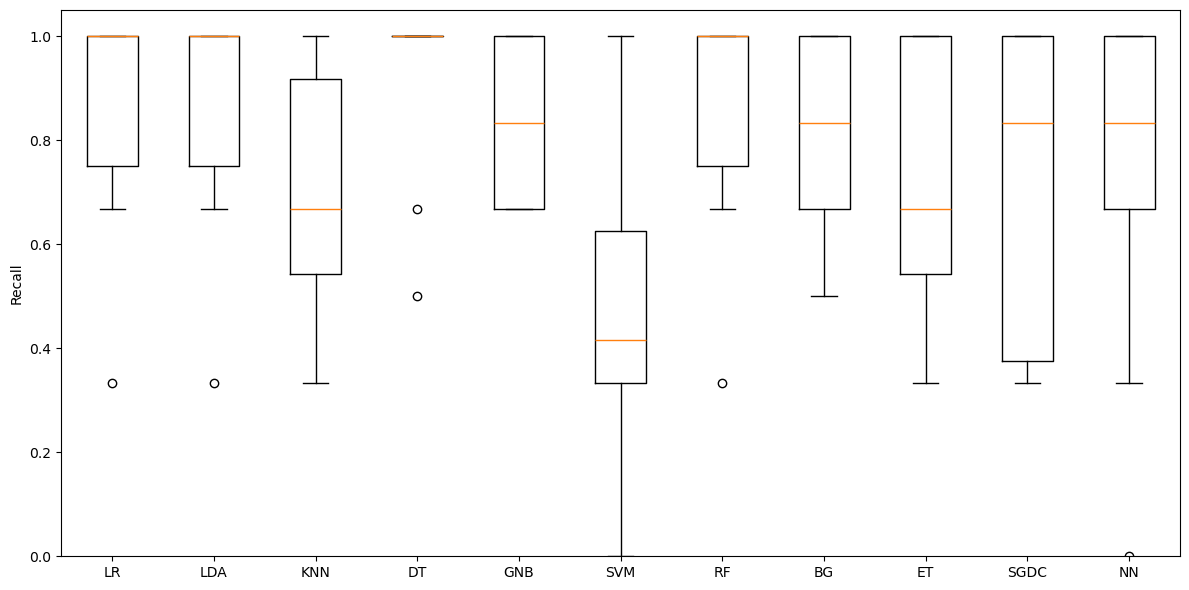

In [384]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'

# AUC 
print('Calculating Recalls')
for name, model in models:
    #using stratified due to slight class imalanc rather than use SMOTE on such a small dataset
    kfold = StratifiedKFold(n_splits=10,  shuffle=True, random_state=42)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,6))
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.ylim(0.0,1.05)
#plt.grid()
plt.tight_layout()

LR, LDA, DT, RF

Look at: LR, LDA, RF? ...
Maybe look at SVM as well just because i like this... use a different kernel? radial... 

# Model Training
- train the chosen models on the dataset before and after using RFE

## Random Forest Model

### With RFE

In [385]:
from sklearn.metrics import accuracy_score

# first look at test acc before tuning
rf = RandomForestClassifier(random_state=42)

rf.fit(X, y)

y_pred_rf_bef = rf.predict(X_final_test)

test_accuracy_rf_bef = accuracy_score(y_test, y_pred_rf_bef)
print("Test Accuracy:", test_accuracy_rf_bef)


Test Accuracy: 0.7241379310344828


/var/folders/wx/xgpv52sj18xfvw0gwvgctrjr0000gq/T/ipykernel_78135/3927001076.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


In [386]:
from sklearn.model_selection import GridSearchCV

# initialize model
rf = RandomForestClassifier(random_state=42)

# set up parameter grid to search across
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# initialize the grid search
grid_search = GridSearchCV(rf, param_grid, cv = 5)

# need y as an array
y=np.ravel(y)

# fit the grid search to training data 
grid_search.fit(X, y)

print("Best parameters: ", grid_search.best_params_)
print("Best Cross Validation score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross Validation score:  0.8803030303030303


Sensitivity (Recall): 0.8461538461538461
Specificity:  0.625


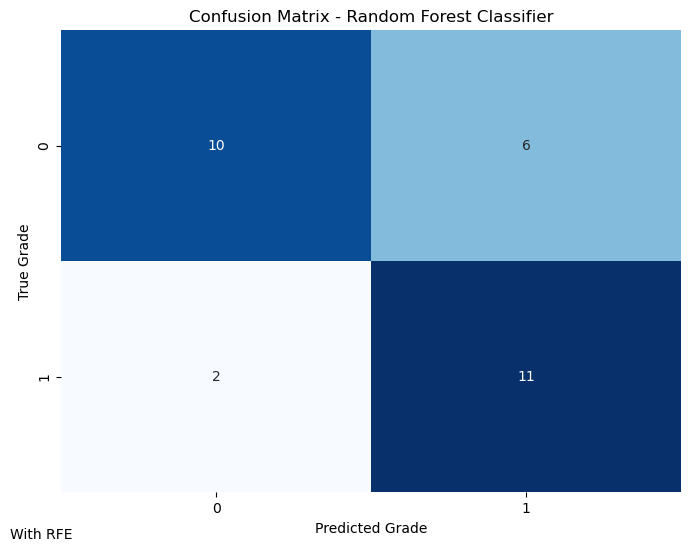

In [387]:
from sklearn.metrics import confusion_matrix
# now get the best model and a test error and confusion matrix

best_model_rf = grid_search.best_estimator_

# predict the labels for the test set
y_pred_rf = best_model_rf.predict(X_final_test)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# extract true positives, false negatives, false positives and true negatives
tn, fp, fn, tp = conf_matrix.ravel()

#calc sesitivity/recall
sensitivity_rf = tp / (tp + fn)

# calc specificity
specificity_rf = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity_rf)
print("Specificity: ", specificity_rf)

# visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.suptitle("With RFE", x=0.1,y=0.05,fontsize=10)

plt.show()

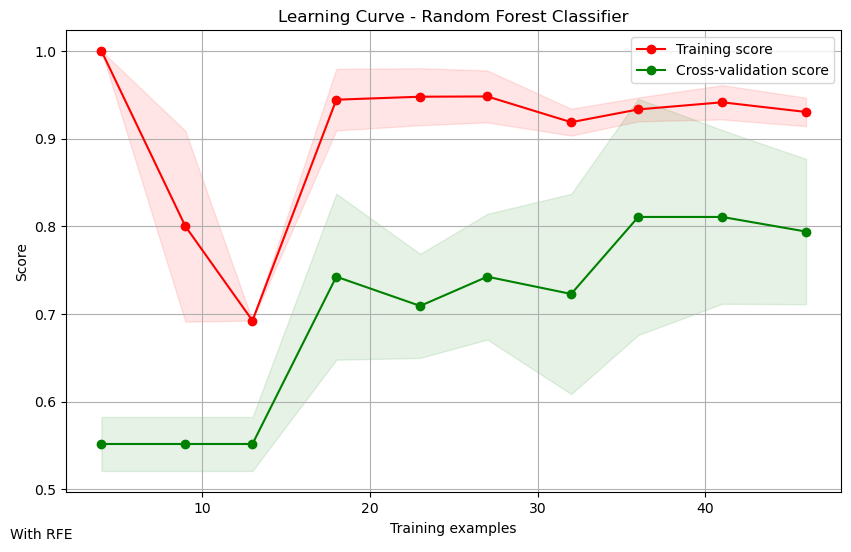

In [388]:
from sklearn.model_selection import learning_curve, StratifiedKFold

# Define StratifiedKFold with desired number of splits
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use StratifiedKFold in learning_curve
train_sizes, train_scores, valid_scores = learning_curve(best_model_rf, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - Random Forest Classifier")
plt.suptitle("With RFE", x=0.1,y=0.05,fontsize=10)
plt.legend(loc="best")
plt.grid(True)
plt.show()



appears overfit

In [389]:
# now display final test error
from sklearn.metrics import accuracy_score
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", test_accuracy_rf)

Test Accuracy: 0.7241379310344828


### Without RFE

In [391]:
# first look at test acc before tuning
X_no_rfe = df_lasso_train
X_test_no_rfe = df_lasso_test
y_no_rfe = np.ravel(y_train_df)

rf = RandomForestClassifier(random_state=42)

rf.fit(X_no_rfe, y_no_rfe)

y_pred_rf_bef_no = rf.predict(X_test_no_rfe)

test_accuracy_rf_bef_no = accuracy_score(y_test, y_pred_rf_bef_no)
print("Test Accuracy:", test_accuracy_rf_bef_no)

Test Accuracy: 0.7586206896551724


In [285]:
X_no_rfe = df_lasso_train
X_test_no_rfe = df_lasso_test
y_no_rfe = np.ravel(y_train_df)

# initialize model
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# fit the grid search to training data 
grid_search.fit(X_no_rfe, y_no_rfe)

print("Best parameters: ", grid_search.best_params_)
print("Best Cross Validation score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross Validation score:  0.8303030303030303


Sensitivity (Recall): 0.8461538461538461
Specificity:  0.625


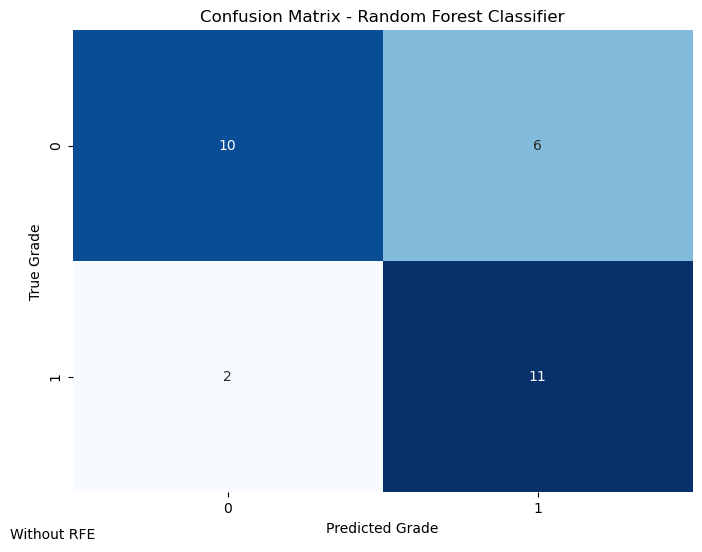

In [286]:
best_model_rf_no = grid_search.best_estimator_

# predict the labels for the test set
y_pred_rf_no = best_model_rf_no.predict(X_test_no_rfe)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_no)

# extract true positives, false negatives, false positives and true negatives
tn, fp, fn, tp = conf_matrix.ravel()

#calc sesitivity/recall
sensitivity_rf_no = tp / (tp + fn)

# calc specificity
specificity_rf_no = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity_rf_no)
print("Specificity: ", specificity_rf_no)
# visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.suptitle("Without RFE", x=0.1,y=0.05,fontsize=10)
plt.show()

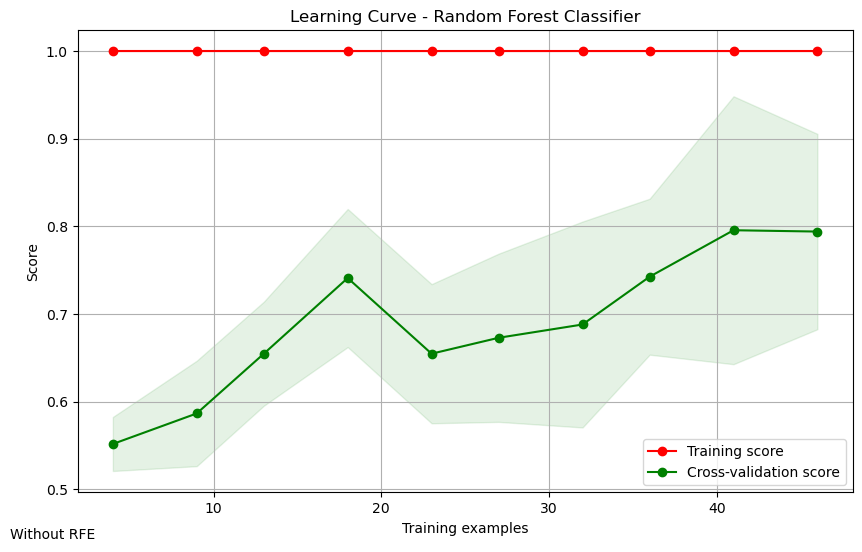

In [287]:
# Define StratifiedKFold with desired number of splits
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use StratifiedKFold in learning_curve
train_sizes, train_scores, valid_scores = learning_curve(best_model_rf_no, X_no_rfe, y_no_rfe, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - Random Forest Classifier")
plt.suptitle("Without RFE", x=0.1,y=0.05,fontsize=10)
plt.legend(loc="best")
plt.grid(True)
plt.show()

appears overfit again

In [288]:
# now display final test error

test_accuracy_rf_no = accuracy_score(y_test, y_pred_rf_no)
print("Test Accuracy:", test_accuracy_rf_no)

Test Accuracy: 0.7241379310344828


## Logistic Regression Model

### With RFE

In [289]:
# initialize the model
logr = LogisticRegression(random_state=42, solver='liblinear')

# define the hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ['l1', 'l2'],
}

# perform grid search
grid_search = GridSearchCV(logr, param_grid, cv = 5)
grid_search.fit(X,y)

# Get the best params
print("Best parameters:", grid_search.best_params_)

# get the cv score
print("Best Cross Validation Score", grid_search.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross Validation Score 0.8636363636363636


Sensitivity (Recall): 0.8461538461538461
Specificity:  0.5625


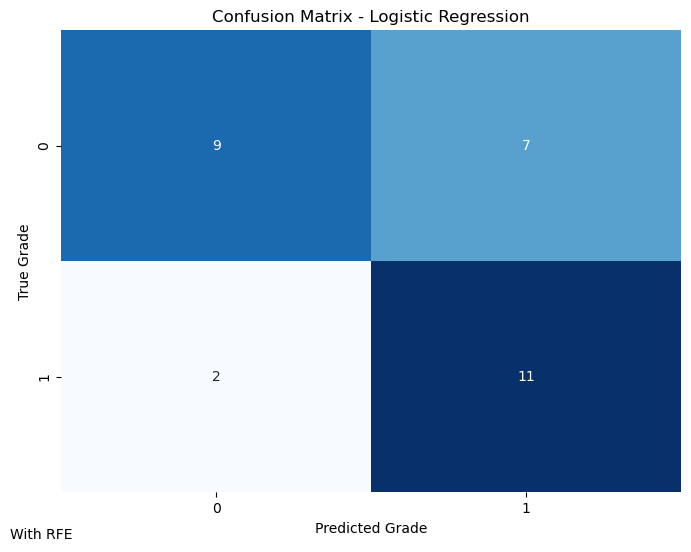

In [290]:
# now get the best model and a test error and confusion matrix

best_model_lr = grid_search.best_estimator_

# predict the labels for the test set
y_pred_lr = best_model_lr.predict(X_final_test)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# extract true positives, false negatives, false positives and true negatives
tn, fp, fn, tp = conf_matrix.ravel()

#calc sesitivity/recall
sensitivity_lr = tp / (tp + fn)

# calc specificity
specificity_lr = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity_lr)
print("Specificity: ", specificity_lr)

# visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix - Logistic Regression')
plt.suptitle("With RFE", x=0.1,y=0.05,fontsize=10)
plt.show()

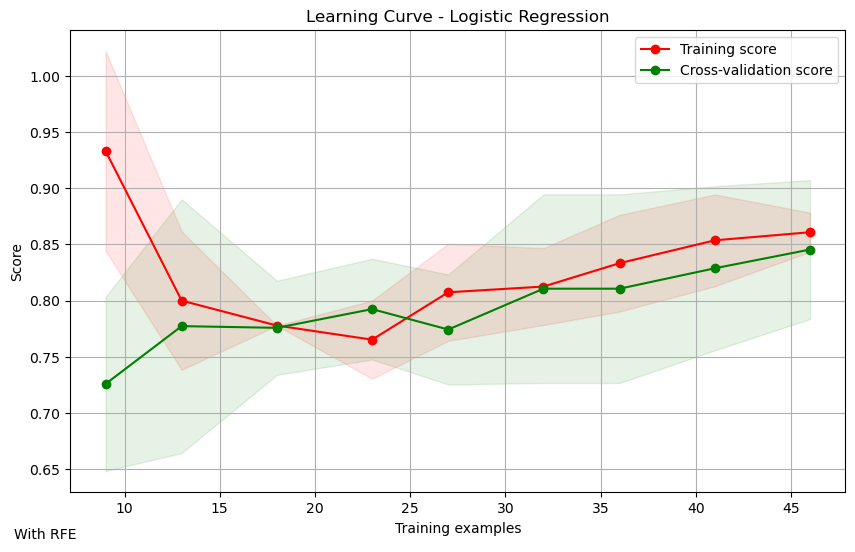

In [291]:
train_sizes, train_scores, valid_scores = learning_curve(best_model_lr, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - Logistic Regression")
plt.suptitle("With RFE", x=0.1,y=0.05,fontsize=10)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [292]:
# now display final test error
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", test_accuracy_lr)


Test Accuracy: 0.6896551724137931


### Without RFE

In [293]:
# initialize the model
logr = LogisticRegression(random_state=42, solver='liblinear')

# define the hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ['l1', 'l2'],
}

# perform grid search
grid_search = GridSearchCV(logr, param_grid, cv = 5)
grid_search.fit(X_no_rfe,y_no_rfe)

# Get the best params
print("Best parameters:", grid_search.best_params_)

# get the cv score
print("Best Cross Validation Score", grid_search.best_score_)

Best parameters: {'C': 0.01, 'penalty': 'l2'}
Best Cross Validation Score 0.8106060606060608


Sensitivity (Recall): 0.9230769230769231
Specificity:  0.75


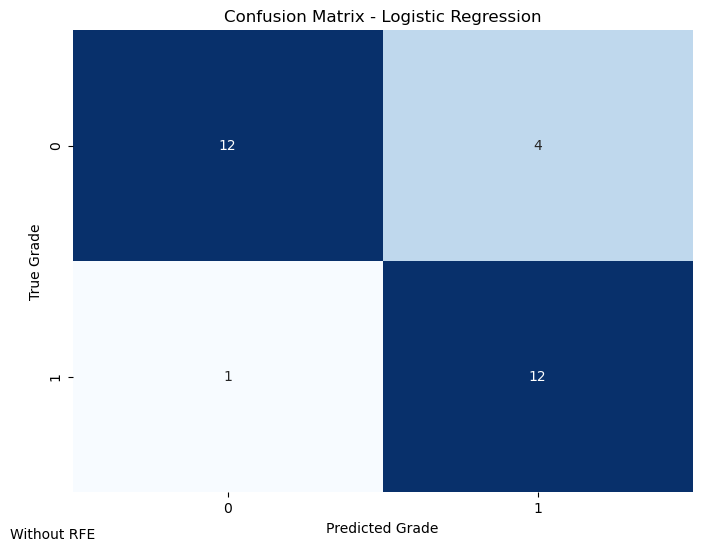

In [294]:
# now get the best model and a test error and confusion matrix

best_model_lr_no = grid_search.best_estimator_

# predict the labels for the test set
y_pred_lr_no = best_model_lr_no.predict(X_test_no_rfe)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_no)

# extract true positives, false negatives, false positives and true negatives
tn, fp, fn, tp = conf_matrix.ravel()

#calc sesitivity/recall
sensitivity_lr_no = tp / (tp + fn)

# calc specificity
specificity_lr_no = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity_lr_no)
print("Specificity: ", specificity_lr_no)

# visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix - Logistic Regression')
plt.suptitle('Without RFE', x=0.1, y=0.05, fontsize=10)
plt.show()

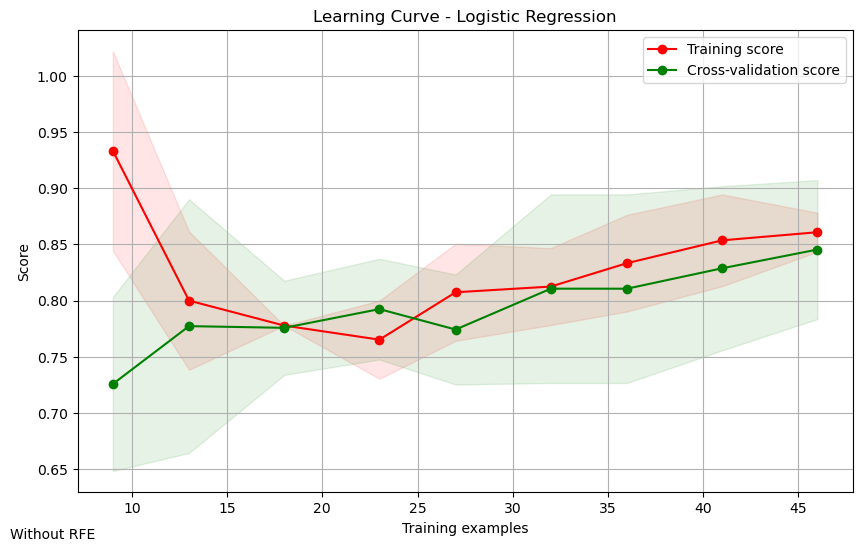

In [295]:
train_sizes, train_scores, valid_scores = learning_curve(best_model_lr, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - Logistic Regression")
plt.suptitle("Without RFE", x=0.1,y=0.05,fontsize=10)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [296]:
# now display final test error
test_accuracy_lr_no = accuracy_score(y_test, y_pred_lr_no)
print("Test Accuracy:", test_accuracy_lr_no)

Test Accuracy: 0.8275862068965517


## Linear Discriminant Analysis Model

### With RFE

In [297]:
# initialize the model
lda_model = LinearDiscriminantAnalysis(solver = 'eigen') # deterministic alg so no random_state required for reproducibility

# set up parameter grid
param_grid = {
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}

# perform grid search
grid_search  = GridSearchCV(lda_model, param_grid, cv = 5)
grid_search.fit(X,y)

# get the best params
print("Best parameters:", grid_search.best_params_)

# get the cv score
print("Best Cross Validation Score:", grid_search.best_score_)

Best parameters: {'shrinkage': 0.5}
Best Cross Validation Score: 0.8636363636363636


Sensitivity (Recall): 0.8461538461538461
Specificity:  0.5625


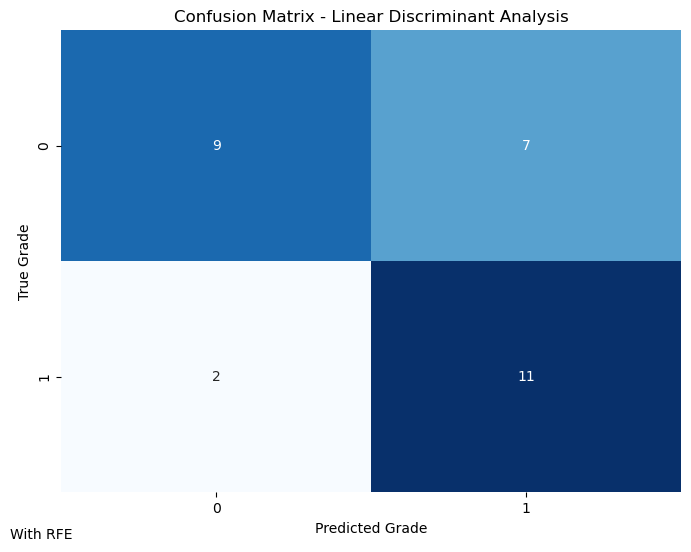

In [298]:
# now get the best model and a test error and confusion matrix

best_model_lda = grid_search.best_estimator_

# predict the labels for the test set
y_pred_lda = best_model_lda.predict(X_final_test)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lda)

# extract true positives, false negatives, false positives and true negatives
tn, fp, fn, tp = conf_matrix.ravel()

#calc sesitivity/recall
sensitivity_lda = tp / (tp + fn)

# calc specificity
specificity_lda = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity_lda)
print("Specificity: ", specificity_lda)

# visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix - Linear Discriminant Analysis')
plt.suptitle("With RFE", x=0.1,y=0.05,fontsize=10)
plt.show()

/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:464: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = np.sort(evals / np.sum(evals))[::-1][
/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/base.py", line 668, in score
   

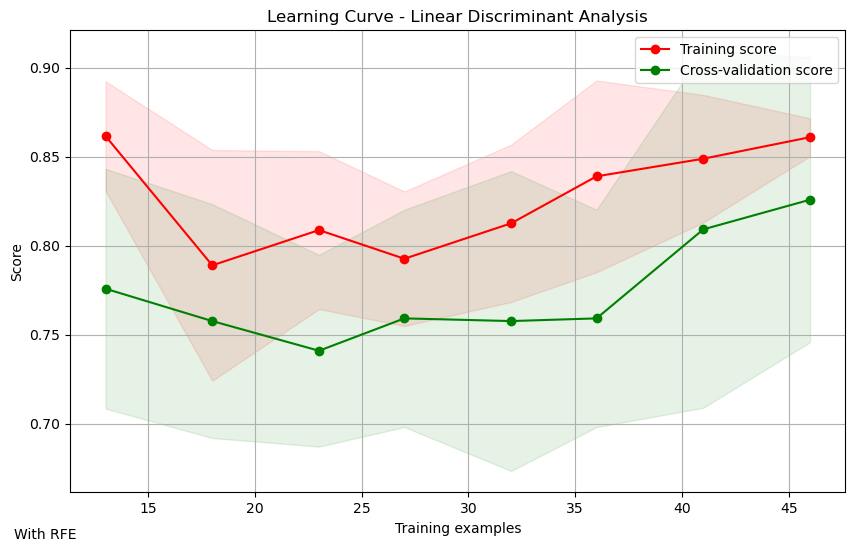

In [299]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, valid_scores = learning_curve(best_model_lda, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - Linear Discriminant Analysis")
plt.suptitle("With RFE", x=0.1, y=0.05, fontsize=10)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [300]:
# now display final test error
test_accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Test Accuracy:", test_accuracy_lda)

Test Accuracy: 0.6896551724137931


### Without RFE

In [301]:
# initialize the model
lda_model = LinearDiscriminantAnalysis(solver = 'eigen') # deterministic alg so no random_state required for reproducibility

# set up parameter grid
param_grid = {
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}

# perform grid search
grid_search  = GridSearchCV(lda_model, param_grid, cv = 5)
grid_search.fit(X_no_rfe,y_no_rfe)

# get the best params
print("Best parameters:", grid_search.best_params_)

# get the cv score
print("Best Cross Validation Score:", grid_search.best_score_)

Best parameters: {'shrinkage': 0.5}
Best Cross Validation Score: 0.8454545454545455


Sensitivity (Recall): 0.9230769230769231
Specificity:  0.8125


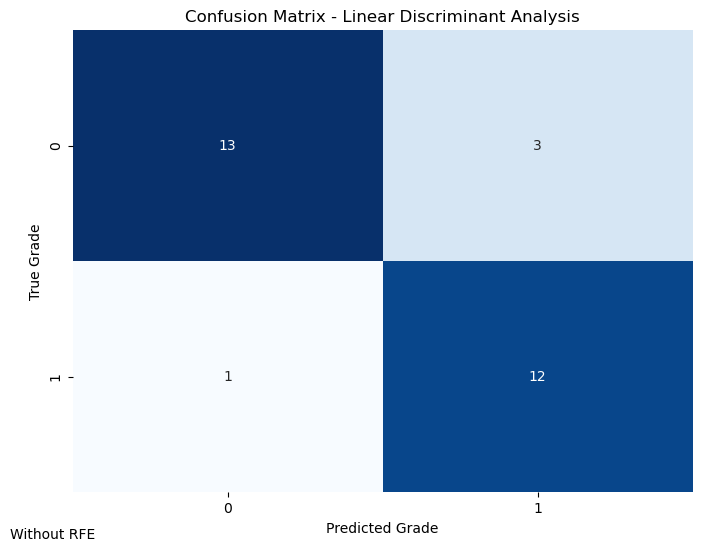

In [302]:
# now get the best model and a test error and confusion matrix

best_model_lda_no = grid_search.best_estimator_

# predict the labels for the test set
y_pred_lda_no = best_model_lda_no.predict(X_test_no_rfe)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lda_no)

# extract true positives, false negatives, false positives and true negatives
tn, fp, fn, tp = conf_matrix.ravel()

#calc sesitivity/recall
sensitivity_lda_no = tp / (tp + fn)

# calc specificity
specificity_lda_no = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity_lda_no)
print("Specificity: ", specificity_lda_no)

# visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix - Linear Discriminant Analysis')
plt.suptitle("Without RFE", x=0.1,y=0.05,fontsize=10)
plt.show()

/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:464: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = np.sort(evals / np.sum(evals))[::-1][
/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/dsfs/lib/python3.11/site-packages/sklearn/base.py", line 668, in score
   

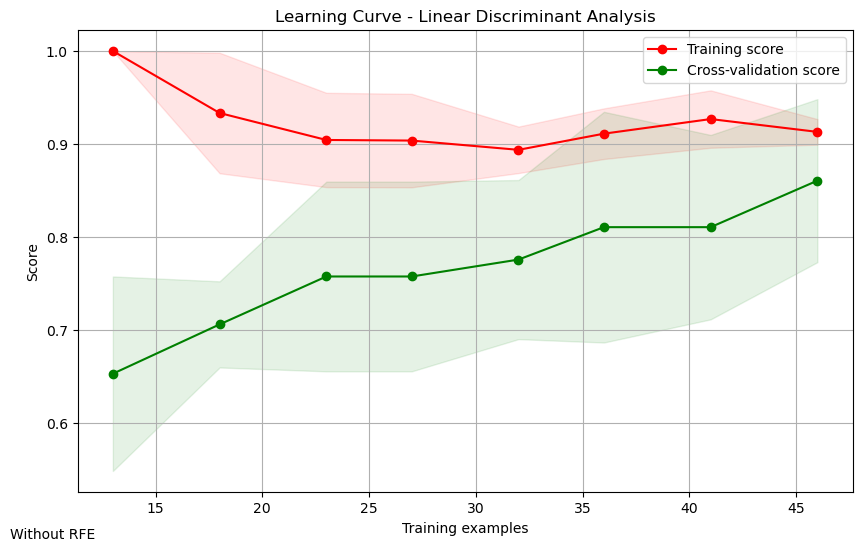

In [303]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, valid_scores = learning_curve(best_model_lda_no, X_no_rfe, y_no_rfe, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
    label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - Linear Discriminant Analysis")
plt.suptitle("Without RFE", x=0.1,y=0.05,fontsize=10)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [304]:
# now display final test error
test_accuracy_lda_no = accuracy_score(y_test, y_pred_lda_no)
print("Test Accuracy:", test_accuracy_lda_no)

Test Accuracy: 0.8620689655172413


## Support Vector Machine (using different kernels)

In [305]:
# initialize the model
svm_model = SVC(probability=True) # deterministic alg so no random_state required for reproducibility

# set up parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],           # Kernel coefficient for 'rbf' and 'poly'
    'class_weight': [None, 'balanced'],   # Weights associated with classes (for handling class imbalance)
}

# perform grid search
grid_search  = GridSearchCV(svm_model, param_grid, cv = 5)
grid_search.fit(X,y)

# get the best params
print("Best parameters:", grid_search.best_params_)

# get the cv score
print("Best Cross Validation Score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross Validation Score: 0.8454545454545455


Sensitivity (Recall): 0.8461538461538461
Specificity:  0.5


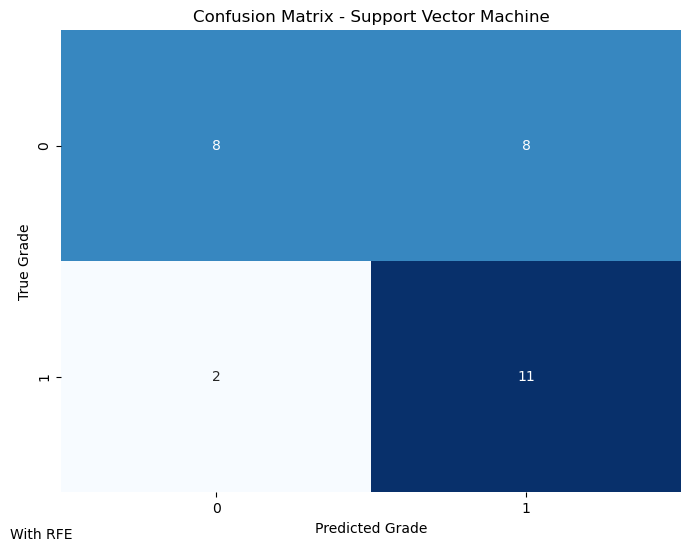

In [306]:
# now get the best model and a test error and confusion matrix

best_model_svm = grid_search.best_estimator_

# predict the labels for the test set
y_pred_svm = best_model_svm.predict(X_final_test)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# extract true positives, false negatives, false positives and true negatives
tn, fp, fn, tp = conf_matrix.ravel()

#calc sesitivity/recall
sensitivity_svm = tp / (tp + fn)

# calc specificity
specificity_svm = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity_svm)
print("Specificity: ", specificity_svm)

# visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix - Support Vector Machine')
plt.suptitle("With RFE", x=0.1,y=0.05,fontsize=10)
plt.show()

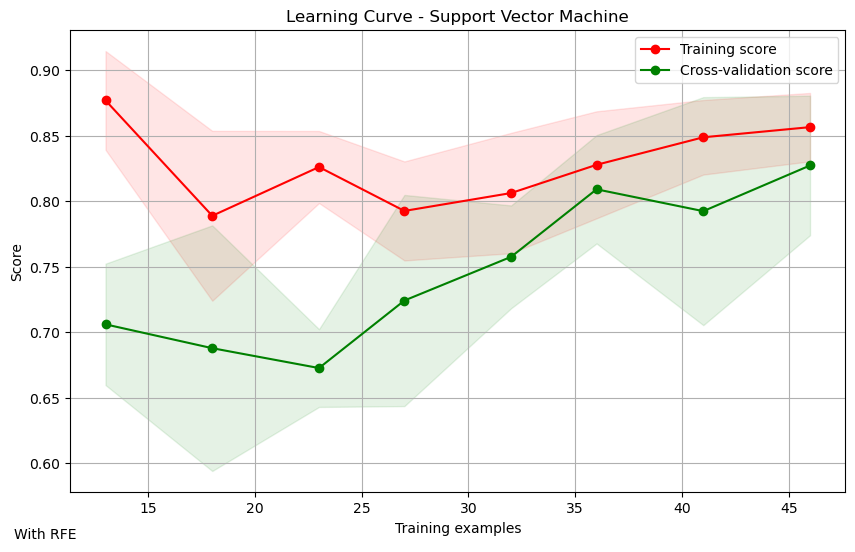

In [307]:
from sklearn.model_selection import learning_curve, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Define StratifiedKFold with desired number of splits
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use StratifiedKFold in learning_curve
train_sizes, train_scores, valid_scores = learning_curve(best_model_svm, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - Support Vector Machine")
plt.suptitle("With RFE", x=0.1,y=0.05,fontsize=10)
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [308]:
# now display final test error
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Test Accuracy:", test_accuracy_svm)

Test Accuracy: 0.6551724137931034


### Without RFE

In [309]:
# initialize the model
svm_model = SVC(probability=True) # deterministic alg so no random_state required for reproducibility

# set up parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],           # Kernel coefficient for 'rbf' and 'poly'
    'class_weight': [None, 'balanced'],   # Weights associated with classes (for handling class imbalance)
}

# perform grid search
grid_search  = GridSearchCV(svm_model, param_grid, cv = 5)
grid_search.fit(X_no_rfe,y_no_rfe)

# get the best params
print("Best parameters:", grid_search.best_params_)

# get the cv score
print("Best Cross Validation Score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best Cross Validation Score: 0.8121212121212121


Sensitivity (Recall): 0.9230769230769231
Specificity:  0.625


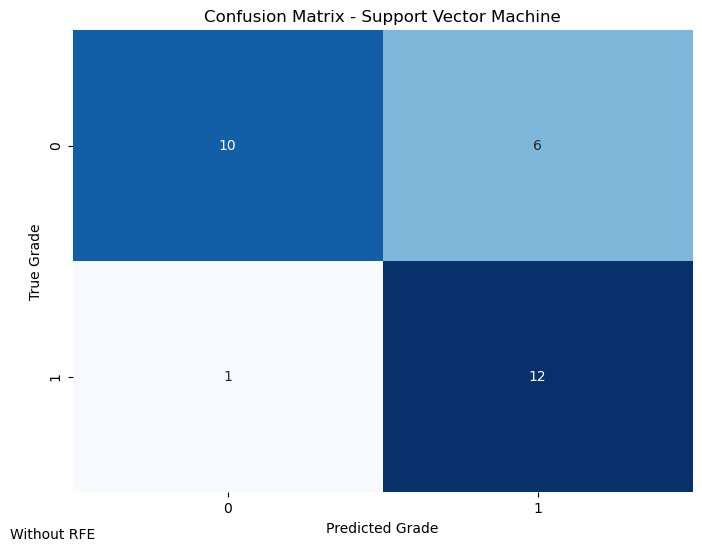

In [310]:
# now get the best model and a test error and confusion matrix

best_model_svm_no = grid_search.best_estimator_

# predict the labels for the test set
y_pred_svm_no = best_model_svm_no.predict(X_test_no_rfe)

# calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_no)

# extract true positives, false negatives, false positives and true negatives
tn, fp, fn, tp = conf_matrix.ravel()

#calc sesitivity/recall
sensitivity_svm_no = tp / (tp + fn)

# calc specificity
specificity_svm_no = tn / (tn + fp)

print("Sensitivity (Recall):", sensitivity_svm_no)
print("Specificity: ", specificity_svm_no)

# visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix - Support Vector Machine')
plt.suptitle("Without RFE", x=0.1,y=0.05,fontsize=10)
plt.show()

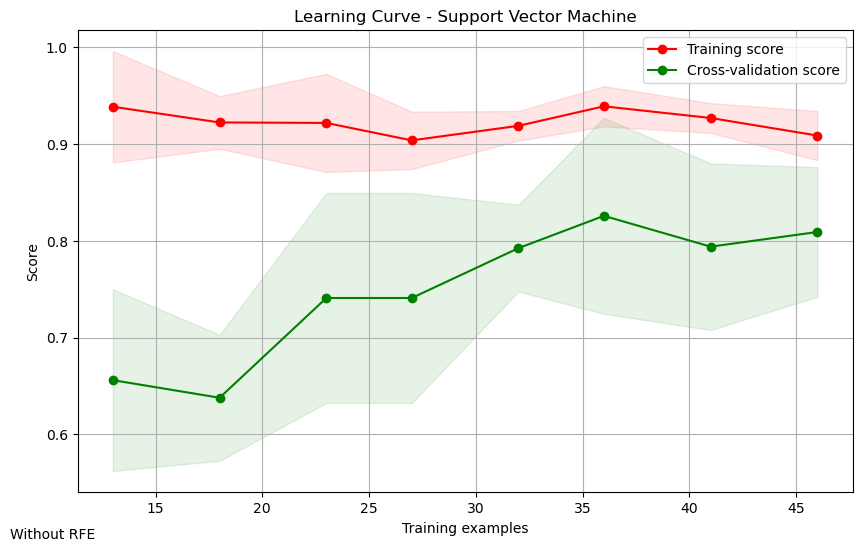

In [311]:
# Define StratifiedKFold with desired number of splits
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use StratifiedKFold in learning_curve
train_sizes, train_scores, valid_scores = learning_curve(best_model_svm_no, X_no_rfe, y_no_rfe, train_sizes=np.linspace(0.1, 1.0, 10), cv=stratified_kfold)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve - Support Vector Machine")
plt.suptitle("Without RFE", x=0.1,y=0.05,fontsize=10)   
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [312]:
# now display final test error
test_accuracy_svm_no = accuracy_score(y_test, y_pred_svm_no)
print("Test Accuracy:", test_accuracy_svm_no)

Test Accuracy: 0.7586206896551724


## Now look at all test accuracies

### With RFE

In [313]:
# create dictionary of test accuracies
test_accuracies = {
    "Random Forest": test_accuracy_rf,
    "Logistic Regression": test_accuracy_lr,
    "Linear Discriminant Analysis": test_accuracy_lda,
    "Support Vector Machine": test_accuracy_svm,
}

# sort by highest to lowest
sorted_acc = sorted(test_accuracies.items(), key = lambda x: x[1], reverse = True)

# convert to df
test_accs = pd.DataFrame(sorted_acc, columns=['Model', 'Test Accuracy'])

print(test_accs)


                          Model  Test Accuracy
0                 Random Forest       0.724138
1           Logistic Regression       0.689655
2  Linear Discriminant Analysis       0.689655
3        Support Vector Machine       0.655172


Random Forest and SVM come out on top.. interesting as not the case when selecting what model to use.

In [314]:
from sklearn.metrics import roc_auc_score
from scipy.stats import norm



# Calculate AUCs
auc1 = roc_auc_score(y_test, y_pred_rf)
auc2 = roc_auc_score(y_test, y_pred_svm)

# Compute the z-score
z_score = (auc1 - auc2) / np.sqrt((auc1 * (1 - auc1) + auc2 * (1 - auc2)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC 1:", auc1)
print("AUC 2:", auc2)
print("p-value:", p_value)


AUC 1: 0.7355769230769231
AUC 2: 0.6730769230769231
p-value: 0.6011502329231564


### Without RFE

In [315]:
# create dictionary of test accuracies
test_accuracies_no = {
    "Random Forest": test_accuracy_rf_no,
    "Logistic Regression": test_accuracy_lr_no,
    "Linear Discriminant Analysis": test_accuracy_lda_no,
    "Support Vector Machine": test_accuracy_svm_no,
}

# sort by highest to lowest
sorted_acc_no = sorted(test_accuracies_no.items(), key = lambda x: x[1], reverse = True)

# convert to df
test_accs_no = pd.DataFrame(sorted_acc_no, columns=['Model', 'Test Accuracy (without RFE)'])

print(test_accs_no)

                          Model  Test Accuracy (without RFE)
0  Linear Discriminant Analysis                     0.862069
1           Logistic Regression                     0.827586
2        Support Vector Machine                     0.758621
3                 Random Forest                     0.724138


In [316]:
# Merge the two DataFrames on the 'Model' column
merged_df = pd.merge(test_accs_no, test_accs, on='Model', how='outer')

print(merged_df)

                          Model  Test Accuracy (without RFE)  Test Accuracy
0  Linear Discriminant Analysis                     0.862069       0.689655
1           Logistic Regression                     0.827586       0.689655
2                 Random Forest                     0.724138       0.724138
3        Support Vector Machine                     0.758621       0.655172


### ROC curves

#### With RFE

Random Forest: auc-roc=0.707
Logistic Regression: auc-roc=0.779
Linear Discriminant Analysis: auc-roc=0.774
Support Vector Machine: auc-roc=0.755


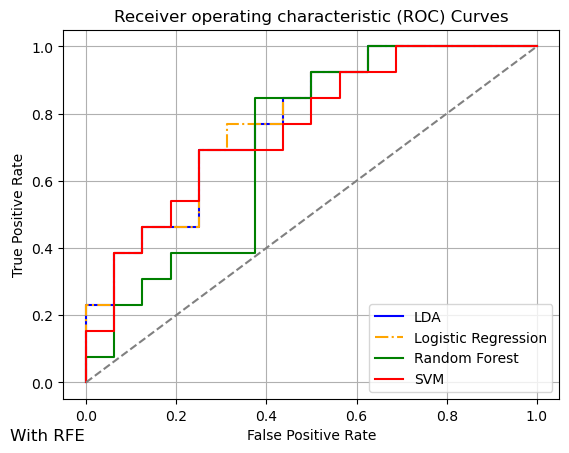

In [317]:
from sklearn.metrics import roc_curve
y_pred_prob_lda = best_model_lda.predict_proba(X_final_test)[:,1]
y_pred_prob_lr = best_model_lr.predict_proba(X_final_test)[:,1]
y_pred_prob_rf = best_model_rf.predict_proba(X_final_test)[:,1]
y_pred_prob_svm = best_model_svm.predict_proba(X_final_test)[:,1]

fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_pred_prob_lda)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
auc_lda = roc_auc_score(y_test, y_pred_prob_lda)
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

print('Random Forest: auc-roc=%.3f' % (auc_rf))
print('Logistic Regression: auc-roc=%.3f' % (auc_lr))
print('Linear Discriminant Analysis: auc-roc=%.3f' % (auc_lda))
print('Support Vector Machine: auc-roc=%.3f' % (auc_svm))

# plot ROC curve
plt.figure()
plt.grid()

plt.plot(fpr_lda, tpr_lda, label='LDA', color='blue')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression', color='orange', linestyle = '-.')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='green')
plt.plot(fpr_svm, tpr_svm, label='SVM', color='red')

plt.plot([0,1],[0,1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curves')
plt.suptitle('With RFE',
             y = 0.05,
             x = 0.1)
plt.legend(loc="lower right")
plt.show()

Random Forest: auc-roc=0.870
Logistic Regression: auc-roc=0.942
Linear Discriminant Analysis: auc-roc=0.904
Support Vector Machine: auc-roc=0.832


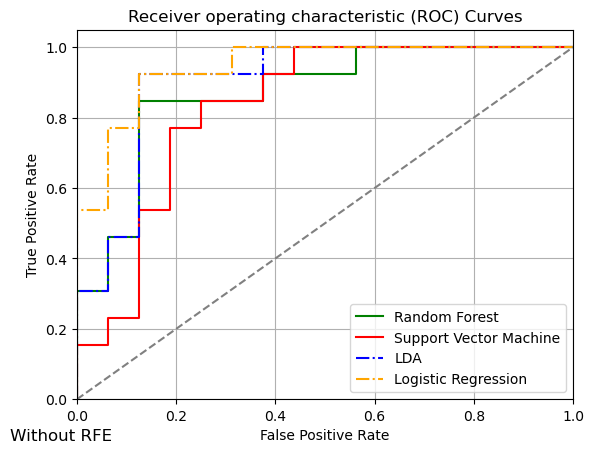

In [427]:
y_pred_prob_lda_no = best_model_lda_no.predict_proba(X_test_no_rfe)[:,1]
y_pred_prob_lr_no = best_model_lr_no.predict_proba(X_test_no_rfe)[:,1]
y_pred_prob_rf_no = best_model_rf_no.predict_proba(X_test_no_rfe)[:,1]
y_pred_prob_svm_no = best_model_svm_no.predict_proba(X_test_no_rfe)[:,1]

fpr_lda_no, tpr_lda_no, thresholds_lda_no = roc_curve(y_test, y_pred_prob_lda_no)
fpr_lr_no, tpr_lr_no, thresholds_lr_no = roc_curve(y_test, y_pred_prob_lr_no)
fpr_rf_no, tpr_rf_no, thresholds_rf_no = roc_curve(y_test, y_pred_prob_rf_no)
fpr_svm_no, tpr_svm_no, thresholds_svm_no = roc_curve(y_test, y_pred_prob_svm_no)

auc_rf_no = roc_auc_score(y_test, y_pred_prob_rf_no)
auc_lr_no = roc_auc_score(y_test, y_pred_prob_lr_no)
auc_lda_no = roc_auc_score(y_test, y_pred_prob_lda_no)
auc_svm_no = roc_auc_score(y_test, y_pred_prob_svm_no)

print('Random Forest: auc-roc=%.3f' % (auc_rf_no))
print('Logistic Regression: auc-roc=%.3f' % (auc_lr_no))
print('Linear Discriminant Analysis: auc-roc=%.3f' % (auc_lda_no))
print('Support Vector Machine: auc-roc=%.3f' % (auc_svm_no))


# plot ROC curve
plt.figure()
plt.grid()
plt.plot(fpr_rf_no, tpr_rf_no, label='Random Forest', color='green')
plt.plot(fpr_svm_no, tpr_svm_no, label='Support Vector Machine', color='red')
plt.plot(fpr_lda_no, tpr_lda_no, label='LDA', color='blue', linestyle='-.')
plt.plot(fpr_lr_no, tpr_lr_no, label='Logistic Regression', color = 'orange', linestyle = '-.')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curves')
plt.suptitle('Without RFE',
             y = 0.05,
             x = 0.1)
plt.legend(loc="lower right")
plt.show()

In [319]:
# compare AUCs using delong test 
# Compute the z-score
z_score = (auc_lda_no - auc_lda) / np.sqrt((auc_lda_no * (1 - auc_lda_no) + auc_lda * (1 - auc_lda)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC of the LDA model with RFE:", auc_lda)
print("AUC of the LDA model without RFE:", auc_lda_no)
print("p-value:", p_value)

AUC of the LDA model with RFE: 0.7740384615384616
AUC of the LDA model without RFE: 0.9038461538461539
p-value: 0.1718850501201653


In [320]:
# Compute the z-score
z_score = (auc_lr_no - auc_lr) / np.sqrt((auc_lr_no * (1 - auc_lr_no) + auc_lr * (1 - auc_lr)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC of the LR model with RFE:", auc_lr)
print("AUC of the LR model without RFE:", auc_lr_no)
print("p-value:", p_value)

AUC of the LR model with RFE: 0.7788461538461539
AUC of the LR model without RFE: 0.9423076923076923
p-value: 0.06443362217091621


In [321]:
# Compute the z-score
z_score = (auc_rf_no - auc_rf) / np.sqrt((auc_rf_no * (1 - auc_rf_no) + auc_rf * (1 - auc_rf)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC of the RF model with RFE:", auc_rf)
print("AUC of the RF model without RFE:", auc_rf_no)
print("p-value:", p_value)

AUC of the RF model with RFE: 0.7067307692307693
AUC of the RF model without RFE: 0.8701923076923077
p-value: 0.1198097247576676


In [322]:
# Compute the z-score
z_score = (auc_svm_no - auc_svm) / np.sqrt((auc_svm_no * (1 - auc_svm_no) + auc_svm * (1 - auc_svm)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC of the SVM model with RFE:", auc_svm)
print("AUC of the SVM model without RFE:", auc_svm_no)
print("p-value:", p_value)

AUC of the SVM model with RFE: 0.7548076923076923
AUC of the SVM model without RFE: 0.8317307692307692
p-value: 0.467470985922841


In [333]:
# table of AUC-ROC and sensitivities, specificities
# Define model names and RFE status
models = ['LDA', 'LR', 'RF', 'SVM']
rfe_status = ['with RFE', 'without RFE']

# Create empty lists to store results
results = []

# Loop through models and RFE status
for model in models:
    for rfe in rfe_status:
        if rfe == 'with RFE':
            auc = eval(f'auc_{model.lower()}')
            sensitivity = eval(f'sensitivity_{model.lower()}')
            specificity = eval(f'specificity_{model.lower()}')
        else:
            auc = eval(f'auc_{model.lower()}_no')
            sensitivity = eval(f'sensitivity_{model.lower()}_no')
            specificity = eval(f'specificity_{model.lower()}_no')
        
        # Append results to the list
        results.append({
            'Model': model,
            'RFE': rfe,
            'AUC': auc,
            'Sensitivity': sensitivity,
            'Specificity': specificity
        })

# Create DataFrame from the results
final_table = pd.DataFrame(results)

# Sort the final table in descending order of AUC
final_table_sorted = final_table.sort_values(by='AUC', ascending=False)

# Print the final sorted table
print(final_table_sorted)


  Model          RFE       AUC  Sensitivity  Specificity
3    LR  without RFE  0.942308     0.923077       0.7500
1   LDA  without RFE  0.903846     0.923077       0.8125
5    RF  without RFE  0.870192     0.846154       0.6250
7   SVM  without RFE  0.831731     0.923077       0.6250
2    LR     with RFE  0.778846     0.846154       0.5625
0   LDA     with RFE  0.774038     0.846154       0.5625
6   SVM     with RFE  0.754808     0.846154       0.5000
4    RF     with RFE  0.706731     0.846154       0.6250


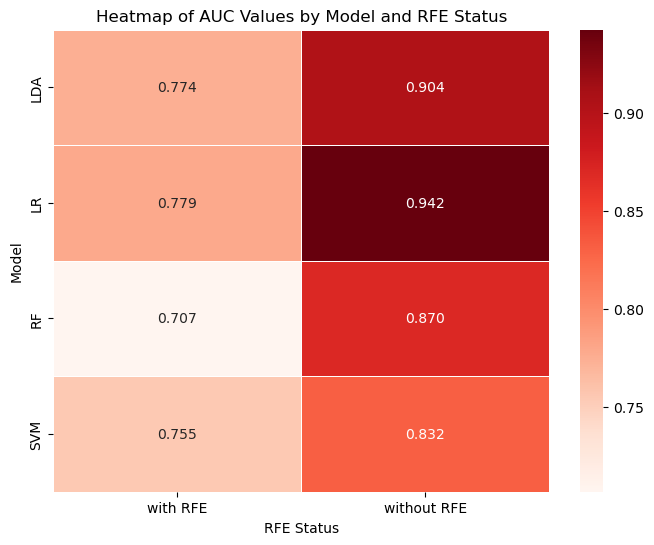

In [325]:
# create a heatmap of the AUC values
# Reshape the DataFrame to have AUC values as data, Model names as index, and RFE status as columns
heatmap_data = final_table.pivot(index='Model', columns='RFE', values='AUC')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".3f", linewidths=.5)
plt.title('Heatmap of AUC Values by Model and RFE Status')
plt.xlabel('RFE Status')
plt.ylabel('Model')
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()


In [326]:
# now to put it into my paper
table_latex = final_table.to_latex(index=False)
print(table_latex)

\begin{tabular}{llrrr}
\toprule
Model & RFE & AUC & Sensitivity & Specificity \\
\midrule
LDA & with RFE & 0.774038 & 0.846154 & 0.562500 \\
LDA & without RFE & 0.903846 & 0.923077 & 0.812500 \\
LR & with RFE & 0.778846 & 0.846154 & 0.562500 \\
LR & without RFE & 0.942308 & 0.923077 & 0.750000 \\
RF & with RFE & 0.706731 & 0.846154 & 0.625000 \\
RF & without RFE & 0.870192 & 0.846154 & 0.625000 \\
SVM & with RFE & 0.754808 & 0.846154 & 0.500000 \\
SVM & without RFE & 0.831731 & 0.923077 & 0.625000 \\
\bottomrule
\end{tabular}



Logistic Regression: f1=0.710 auc_pr=0.744
Linear Discriminant Analysis: f1=0.710 auc_pr=0.741
Random Forest: f1=0.733 auc_pr=0.620
SVM: f1=0.688 auc_pr=0.714


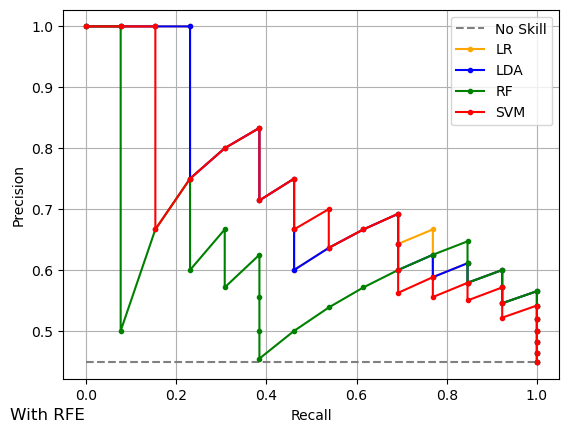

In [327]:
from sklearn.metrics import precision_recall_curve, auc, f1_score
import matplotlib.pyplot as plt

# Assuming you already have y_test and y_pred_lda
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc_pr = auc(lr_recall, lr_precision)
lda_precision, lda_recall, _ = precision_recall_curve(y_test, y_pred_prob_lda)
lda_f1 = f1_score(y_test, y_pred_lda)
lda_auc_pr = auc(lda_recall, lda_precision)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_prob_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc_pr = auc(rf_recall, rf_precision)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_prob_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_auc_pr = auc(svm_recall, svm_precision)

# Summarize scores
print('Logistic Regression: f1=%.3f auc_pr=%.3f' % (lr_f1, lr_auc_pr))
print('Linear Discriminant Analysis: f1=%.3f auc_pr=%.3f' % (lda_f1, lda_auc_pr))
print('Random Forest: f1=%.3f auc_pr=%.3f' % (rf_f1, rf_auc_pr))
print('SVM: f1=%.3f auc_pr=%.3f' % (svm_f1, svm_auc_pr))

# Plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = 'gray')
plt.plot(lr_recall, lr_precision, marker='.', label='LR', color = 'orange')
plt.plot(lda_recall, lda_precision, marker='.', label='LDA', color = 'blue')
plt.plot(rf_recall, rf_precision, marker='.', label='RF', color = 'green')
plt.plot(svm_recall, svm_precision, marker='.', label='SVM', color = 'red')
plt.suptitle('With RFE',
             y = 0.05,
             x = 0.1)
plt.grid()
# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

# Show the plot
plt.show()




Logistic Regression: f1=0.828 auc_pr=0.930
Linear Discriminant Analysis: f1=0.857 auc_pr=0.863
Random Forest: f1=0.733 auc_pr=0.841
SVM: f1=0.774 auc_pr=0.751


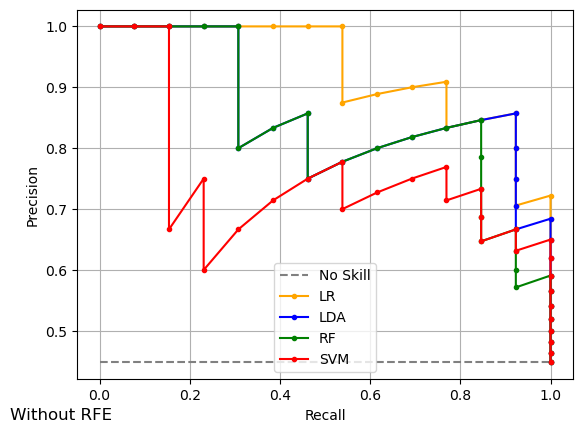

In [328]:
# Assuming you already have y_test and y_pred_lda
lr_precision_no, lr_recall_no, _ = precision_recall_curve(y_test, y_pred_prob_lr_no)
lr_f1_no = f1_score(y_test, y_pred_lr_no)
lr_auc_pr_no = auc(lr_recall_no, lr_precision_no)
lda_precision_no, lda_recall_no, _= precision_recall_curve(y_test, y_pred_prob_lda_no)
lda_f1_no = f1_score(y_test, y_pred_lda_no)
lda_auc_pr_no = auc(lda_recall_no, lda_precision_no)
rf_precision_no, rf_recall_no, _ = precision_recall_curve(y_test, y_pred_prob_rf_no)
rf_f1_no = f1_score(y_test, y_pred_rf_no)
rf_auc_pr_no = auc(rf_recall_no, rf_precision_no)
svm_precision_no, svm_recall_no, _ = precision_recall_curve(y_test, y_pred_prob_svm_no)
svm_f1_no = f1_score(y_test, y_pred_svm_no)
svm_auc_pr_no = auc(svm_recall_no, svm_precision_no)

# Summarize scores
print('Logistic Regression: f1=%.3f auc_pr=%.3f' % (lr_f1_no, lr_auc_pr_no))
print('Linear Discriminant Analysis: f1=%.3f auc_pr=%.3f' % (lda_f1_no, lda_auc_pr_no))
print('Random Forest: f1=%.3f auc_pr=%.3f' % (rf_f1_no, rf_auc_pr_no))
print('SVM: f1=%.3f auc_pr=%.3f' % (svm_f1_no, svm_auc_pr_no))

# Plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = 'gray')
plt.plot(lr_recall_no, lr_precision_no, marker='.', label='LR', color = 'orange')
plt.plot(lda_recall_no, lda_precision_no, marker='.', label='LDA', color = 'blue')
plt.plot(rf_recall_no, rf_precision_no, marker='.', label='RF', color = 'green')
plt.plot(svm_recall_no, svm_precision_no, marker='.', label='SVM', color = 'red')
plt.suptitle('Without RFE',
             y = 0.05,
             x = 0.1)
plt.grid()
# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [329]:
# Compute the z-score
z_score = (lr_auc_pr_no - lr_auc_pr) / np.sqrt((lr_auc_pr_no * (1 - lr_auc_pr_no) + lr_auc_pr * (1 - lr_auc_pr)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC of the LR model with RFE:", lr_auc_pr)
print("AUC of the LR model without RFE:", lr_auc_pr_no)
print("p-value:", p_value)

AUC of the LR model with RFE: 0.7440183409969177
AUC of the LR model without RFE: 0.9297214286467677
p-value: 0.04800777098541833


In [330]:
# Compute the z-score
z_score = (lda_auc_pr_no - lda_auc_pr) / np.sqrt((lda_auc_pr_no * (1 - lda_auc_pr_no) + lda_auc_pr * (1 - lda_auc_pr)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC of the LDA model with RFE:", lda_auc_pr)
print("AUC of the LDA model without RFE:", lda_auc_pr_no)
print("p-value:", p_value)

AUC of the LDA model with RFE: 0.7407674252460019
AUC of the LDA model without RFE: 0.8627970432626302
p-value: 0.23820031834115007


In [331]:
# Compute the z-score
z_score = (rf_auc_pr_no - rf_auc_pr) / np.sqrt((rf_auc_pr_no * (1 - rf_auc_pr_no) + rf_auc_pr * (1 - rf_auc_pr)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC of the RF model with RFE:", rf_auc_pr)
print("AUC of the RF model without RFE:", rf_auc_pr_no)
print("p-value:", p_value)

AUC of the RF model with RFE: 0.6195166297870616
AUC of the RF model without RFE: 0.8405620146570372
p-value: 0.050270500676628756


In [332]:
# Compute the z-score
z_score = (svm_auc_pr_no - svm_auc_pr) / np.sqrt((svm_auc_pr_no * (1 - svm_auc_pr_no) + svm_auc_pr * (1 - svm_auc_pr)) / len(y_test))

# Compute the p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

print("AUC of the SVM model with RFE:", svm_auc_pr)
print("AUC of the SVM model without RFE:", svm_auc_pr_no)
print("p-value:", p_value)

AUC of the SVM model with RFE: 0.7139626780608199
AUC of the SVM model without RFE: 0.750886496742653
p-value: 0.7505755012095535
